# Multiple Regression Analysis on Supermart Grocery Sales


### Import Libraries

The Supermart Grocery Sales - It contains data on orders placed by customers using a grocery delivery application in the state of Tamil Nadu, India. The dataset is a useful resource for understanding consumer behavior in the grocery retail industry, and for performing the Machine learning algorithmns to predict the future and getting the insights into the factors that drive sales in this sector. By analyzing the dataset, data scientist/analyst can identify patterns, trends, and correlations that can help retailers optimize their marketing, pricing, and product strategies to increase sales and revenue.

In [1]:
# import the all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter('ignore')

In [2]:
# load the desired dataset
df=pd.read_csv('D:\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv')
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


#### Understand the dataset:
* Check the number of rows and columns in the dataset.
* Check the data types of each column.
* Check for any missing or null values.

In [3]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
# Number of rows and columns
print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  9994
Number of Columns:  11


In [5]:
# check the columns
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

#### Data cleaning
We can remove any unnecessary columns, rename the columns if needed, and convert the date column into a datetime format if it's not already.

In [6]:
# check the null values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
# check the duplicated records
df.duplicated().sum()

0

In [8]:
# drop the un important variables
df.drop(columns=['Order ID','State'],inplace=True)

In [9]:
# renaming the columns
df.rename(columns={'Customer Name':'Customer_Name','Sub Category':'Sub_Category','Order Date':'Order_Date'},inplace=True)

In [10]:
# change the datetime column
df['Order_Date']=pd.to_datetime(df['Order_Date'],errors='coerce')

#### Exploratory data analysis:
We can calculate basic statistics such as mean, median, and mode for the numerical columns, and create visualizations such as histograms, scatterplots, and boxplots to understand the distribution of the data.

In [11]:
# describibg the numerical variables
df.describe()

,Order_Date,Sales,Discount,Profit
count,4042,9994.000000,9994.000000,9994.000000
mean,2017-04-28 03:16:17.931716864,1496.596158,0.226817,374.937082
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000
25%,2016-05-09 06:00:00,1000.000000,0.160000,180.022500
50%,2017-07-01 00:00:00,1498.000000,0.230000,320.780000
75%,2018-06-01 00:00:00,1994.750000,0.290000,525.627500
max,2018-12-11 00:00:00,2500.000000,0.350000,1120.950000
std,NaN,577.559036,0.074636,239.932881


In [12]:
# describing the categorical variables
df.describe(include='object')

,Customer_Name,Category,Sub_Category,City,Region
count,9994,9994,9994,9994,9994
unique,50,7,23,24,5
top,Amrish,Snacks,Health Drinks,Kanyakumari,West
freq,227,1514,719,459,3203


In [13]:
# check the unique and their value counts
for i in df.columns:
    if df[i].dtype=='object' and i!='Order ID':
        print('\n',f'====== {i} ======')
        print('Total count: ',len(df))
        print('total unique count: ',df[i].nunique())
        print(df[i].value_counts())


 ====== Customer_Name ======
Total count:  9994
total unique count:  50
Customer_Name
Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Shah        215
Suresh      212
Surya       209
Harish      208
Hussain     208
Sudeep      207
Komal       206
Veena       205
Mathew      205
Adavan      205
Ridhesh     204
Muneer      204
Peer        204
Veronica    203
Arvind      203
Vinne       203
Sharon      202
Haseena     202
Malik       201
Yusuf       201
Roshan      201
Shree       200
Ravi        200
Jonas       198
Alan        198
James       197
Ram         197
Amy         196
Akash       196
Willams     195
Sheeba      195
Rumaiza     195
Ganesh      193
Esther      189
Sudha       189
Vince       188
Ramesh      188
Sabeela     188
Sundar      187
Aditi       187
Anu         186
Yadav       185
Jackson     182
Kumar       181
Hafiz       174
Name: count, dtype: int64

 ====== Category ======
Total count:  9994
total unique count:  7
Category
Snacks     

In [14]:
# There is only one record for North we remove that record
df.drop((df[df['Region']=='North']).index,inplace=True)

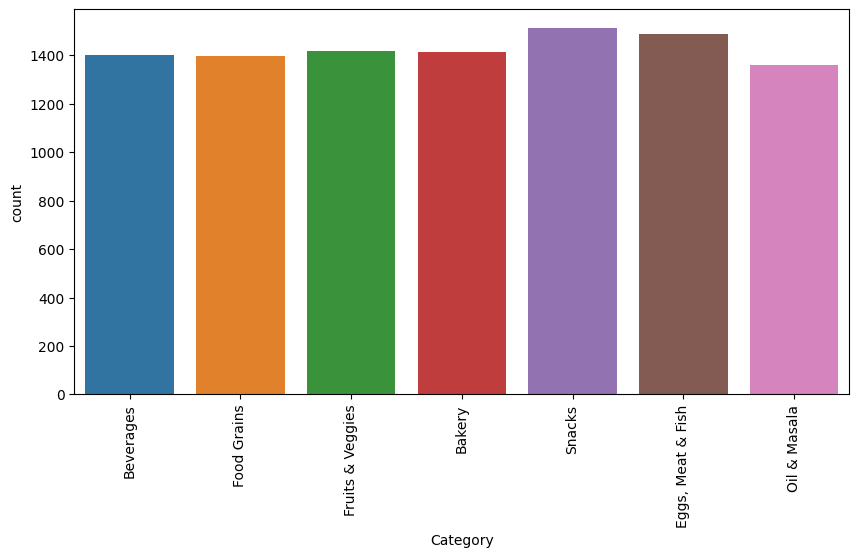

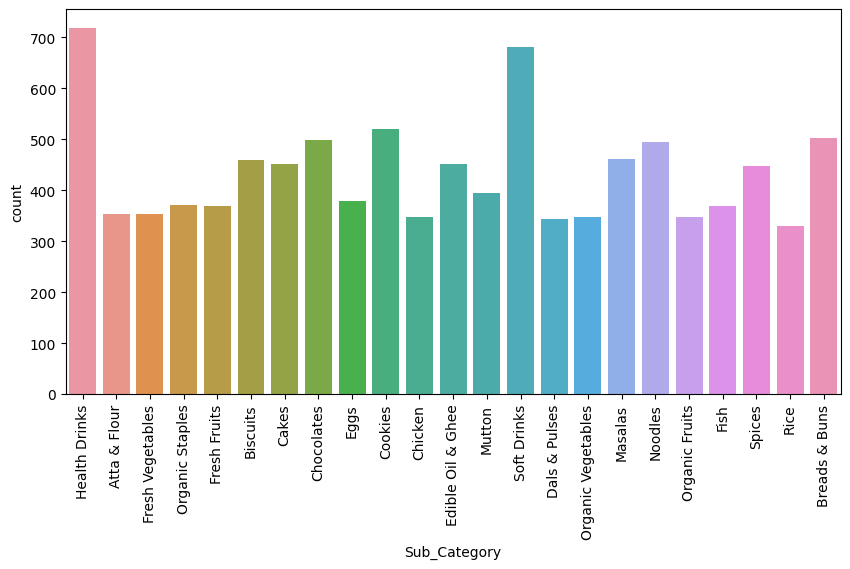

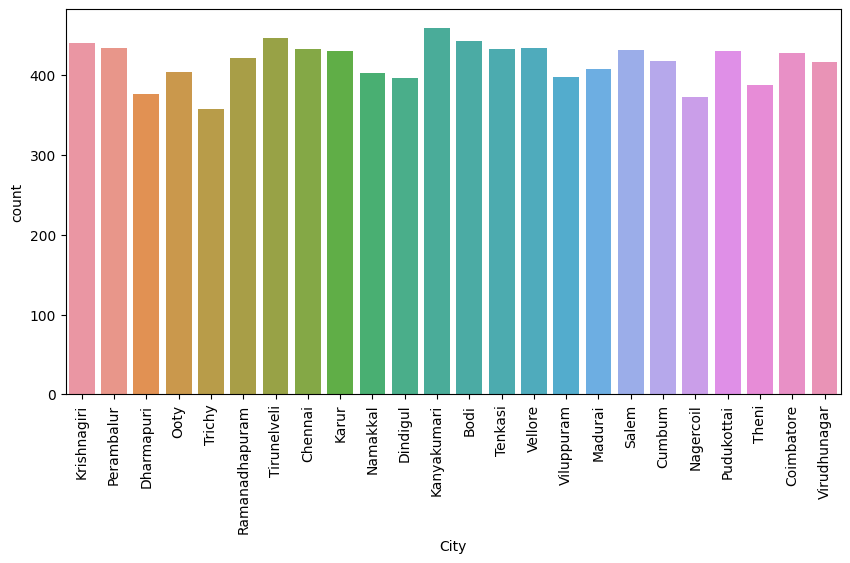

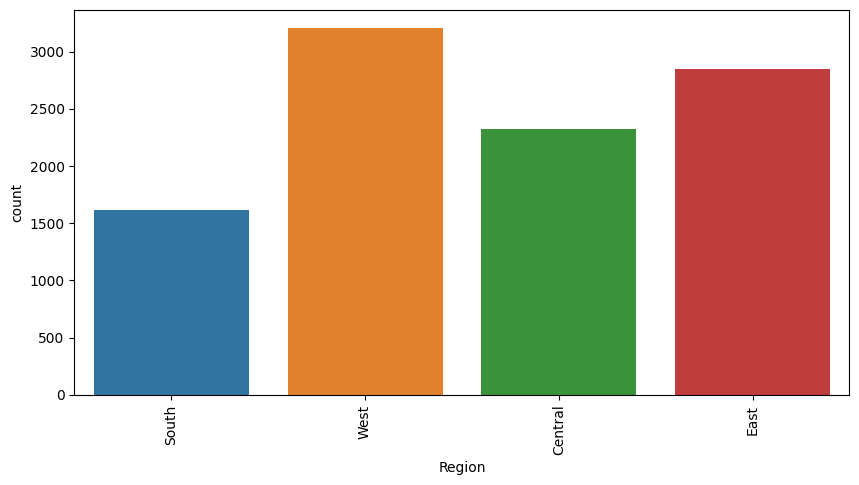

In [15]:
# visualizing the variables their count
for i in df.columns:
    if df[i].dtypes=='object' and i not in ['Customer_Name','Order_Date']:
        plt.figure(figsize=(10,5))
        sns.countplot(x=df[i])
        plt.xticks(rotation=90)
        plt.show()

In [16]:
# region-wise total sales and profit
sales_by_region=df.groupby('Region')['Sales'].sum().reset_index()
profit_by_region=df.groupby('Region')['Profit'].sum().reset_index()
sales_profit_by_region=pd.merge(sales_by_region,profit_by_region,on='Region')
sales_profit_by_region

,Region,Sales,Profit
0,Central,3468156,856806.84
1,East,4248368,1074345.58
2,South,2440461,623562.89
3,West,4798743,1192004.61


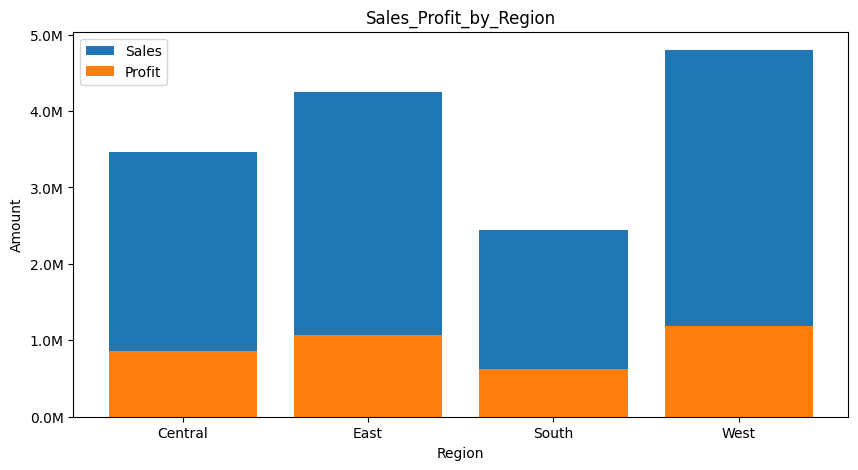

In [17]:
# visualizing the total sales and profit
# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x*1e-6:.1f}M'
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.bar(sales_profit_by_region['Region'],sales_profit_by_region['Sales'],label='Sales')
plt.bar(sales_profit_by_region['Region'],sales_profit_by_region['Profit'],label='Profit')
plt.title('Sales_Profit_by_Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.show()

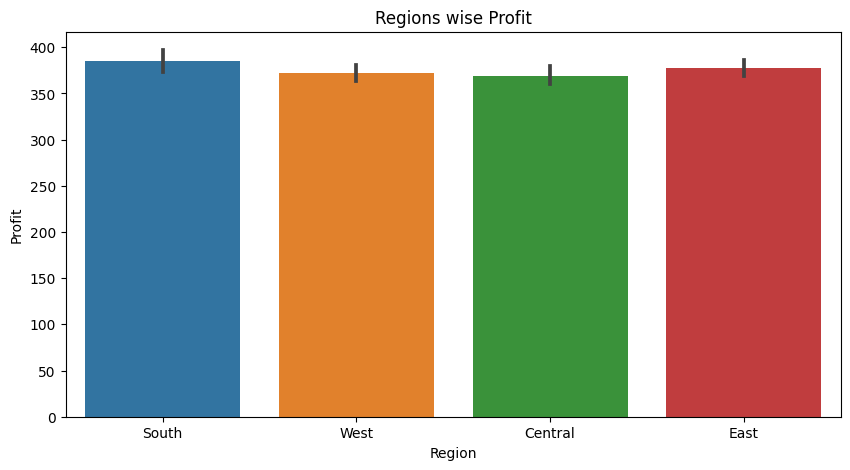

In [18]:
# region-wise profit count
plt.figure(figsize=(10,5))
sns.barplot(x='Region',y='Profit',data=df)
plt.title('Regions wise Profit')
plt.show()

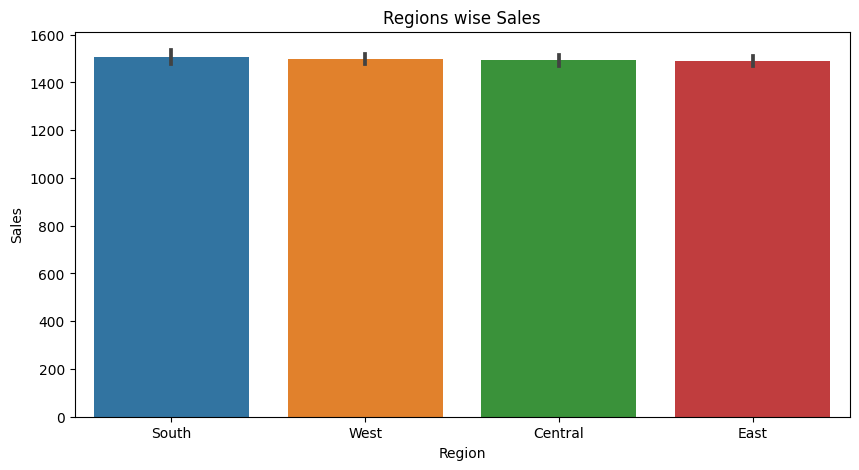

In [19]:
# region-wise sales count
plt.figure(figsize=(10,5))
sns.barplot(x='Region',y='Sales',data=df)
plt.title('Regions wise Sales')
plt.show()

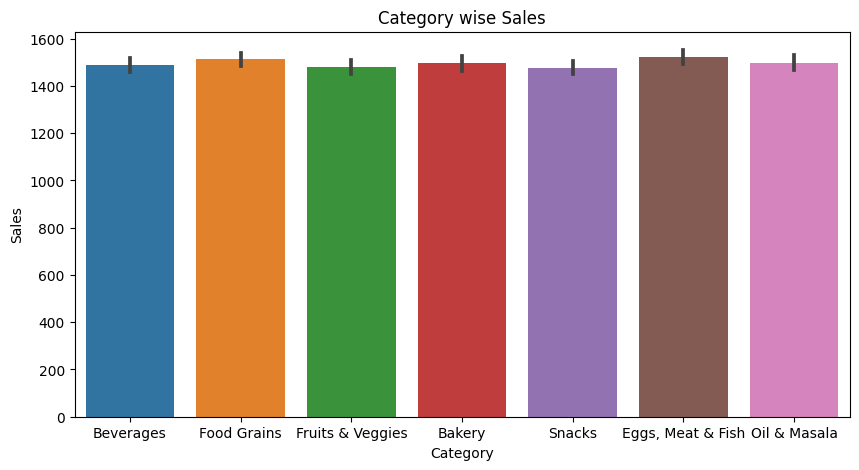

In [20]:
# sales count by category
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales',data=df)
plt.title('Category wise Sales')
plt.show()

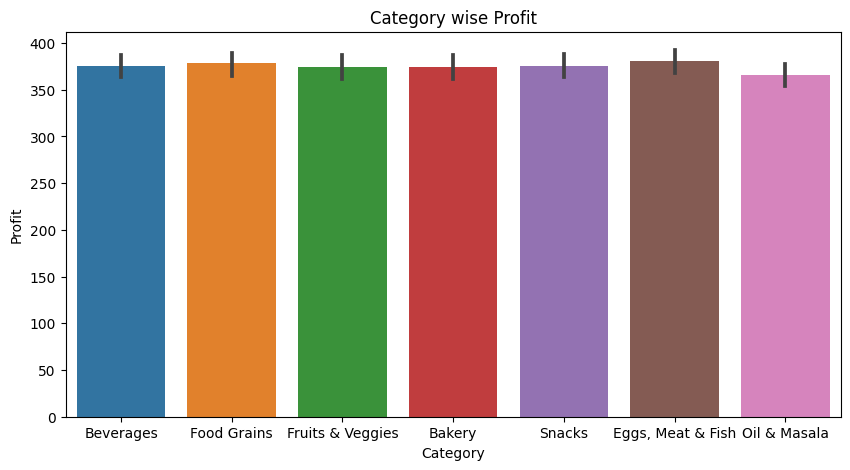

In [21]:
#profit count by categoty
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Profit',data=df)
plt.title('Category wise Profit')
plt.show()

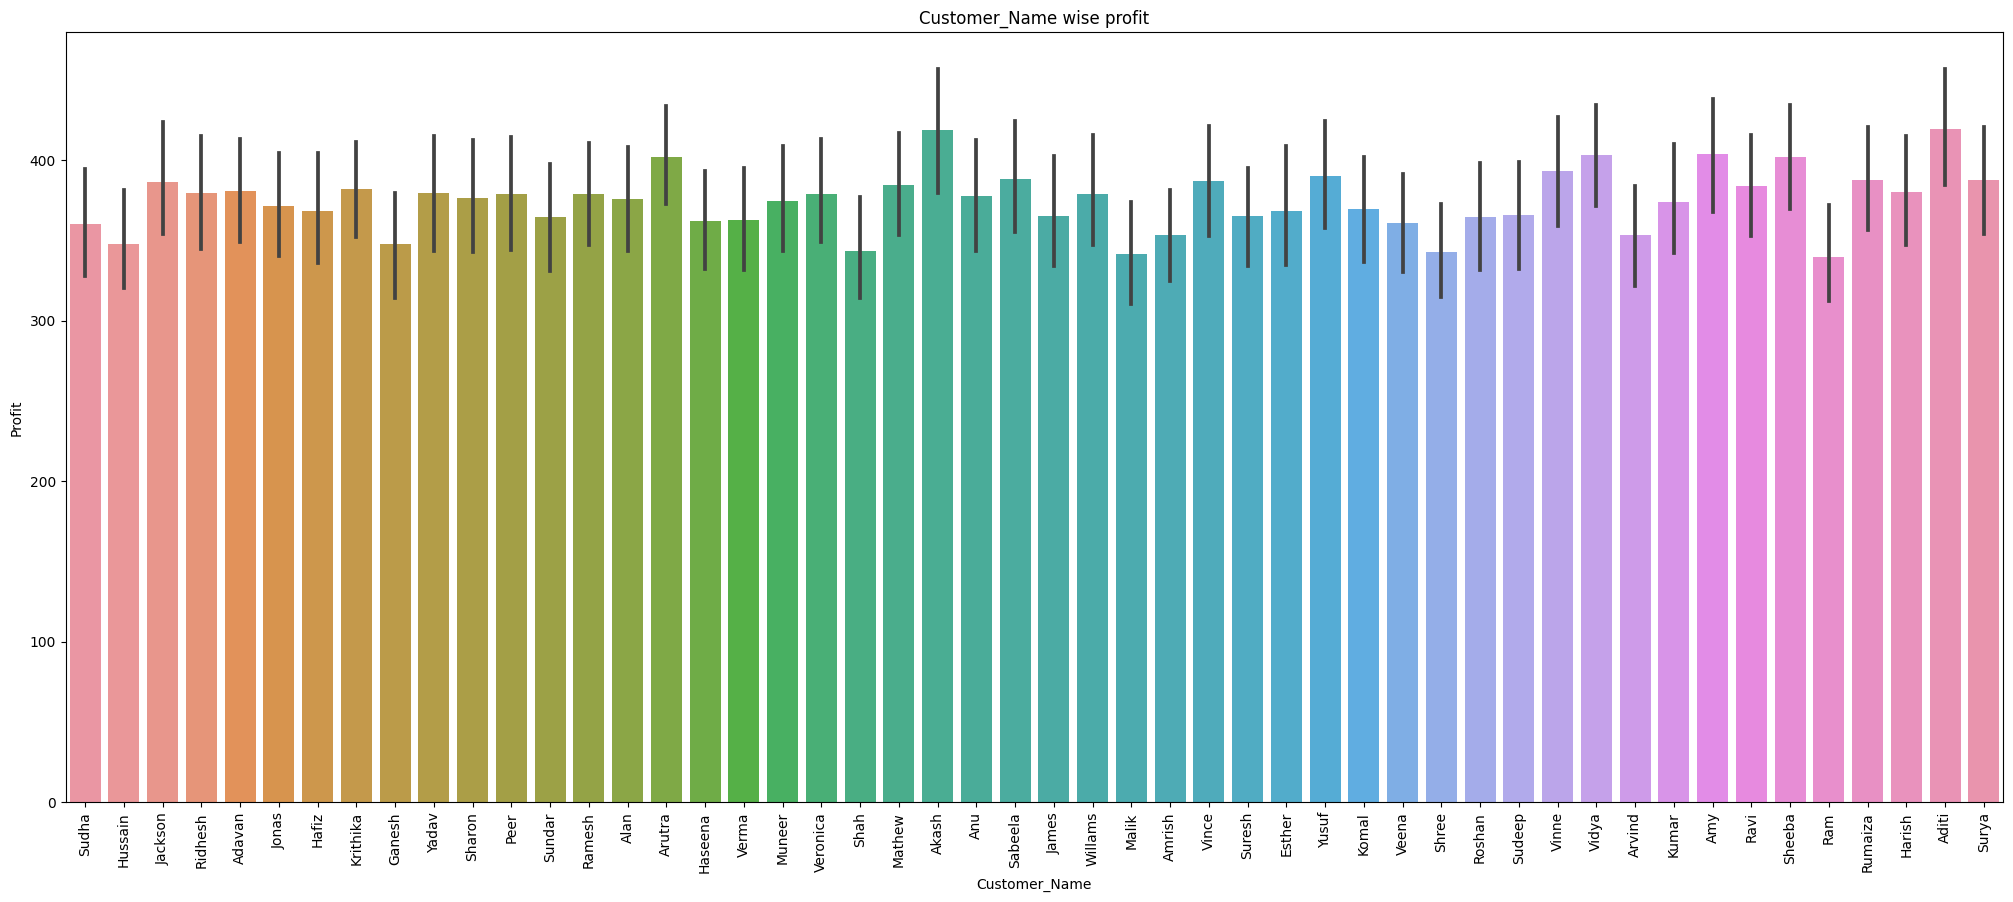

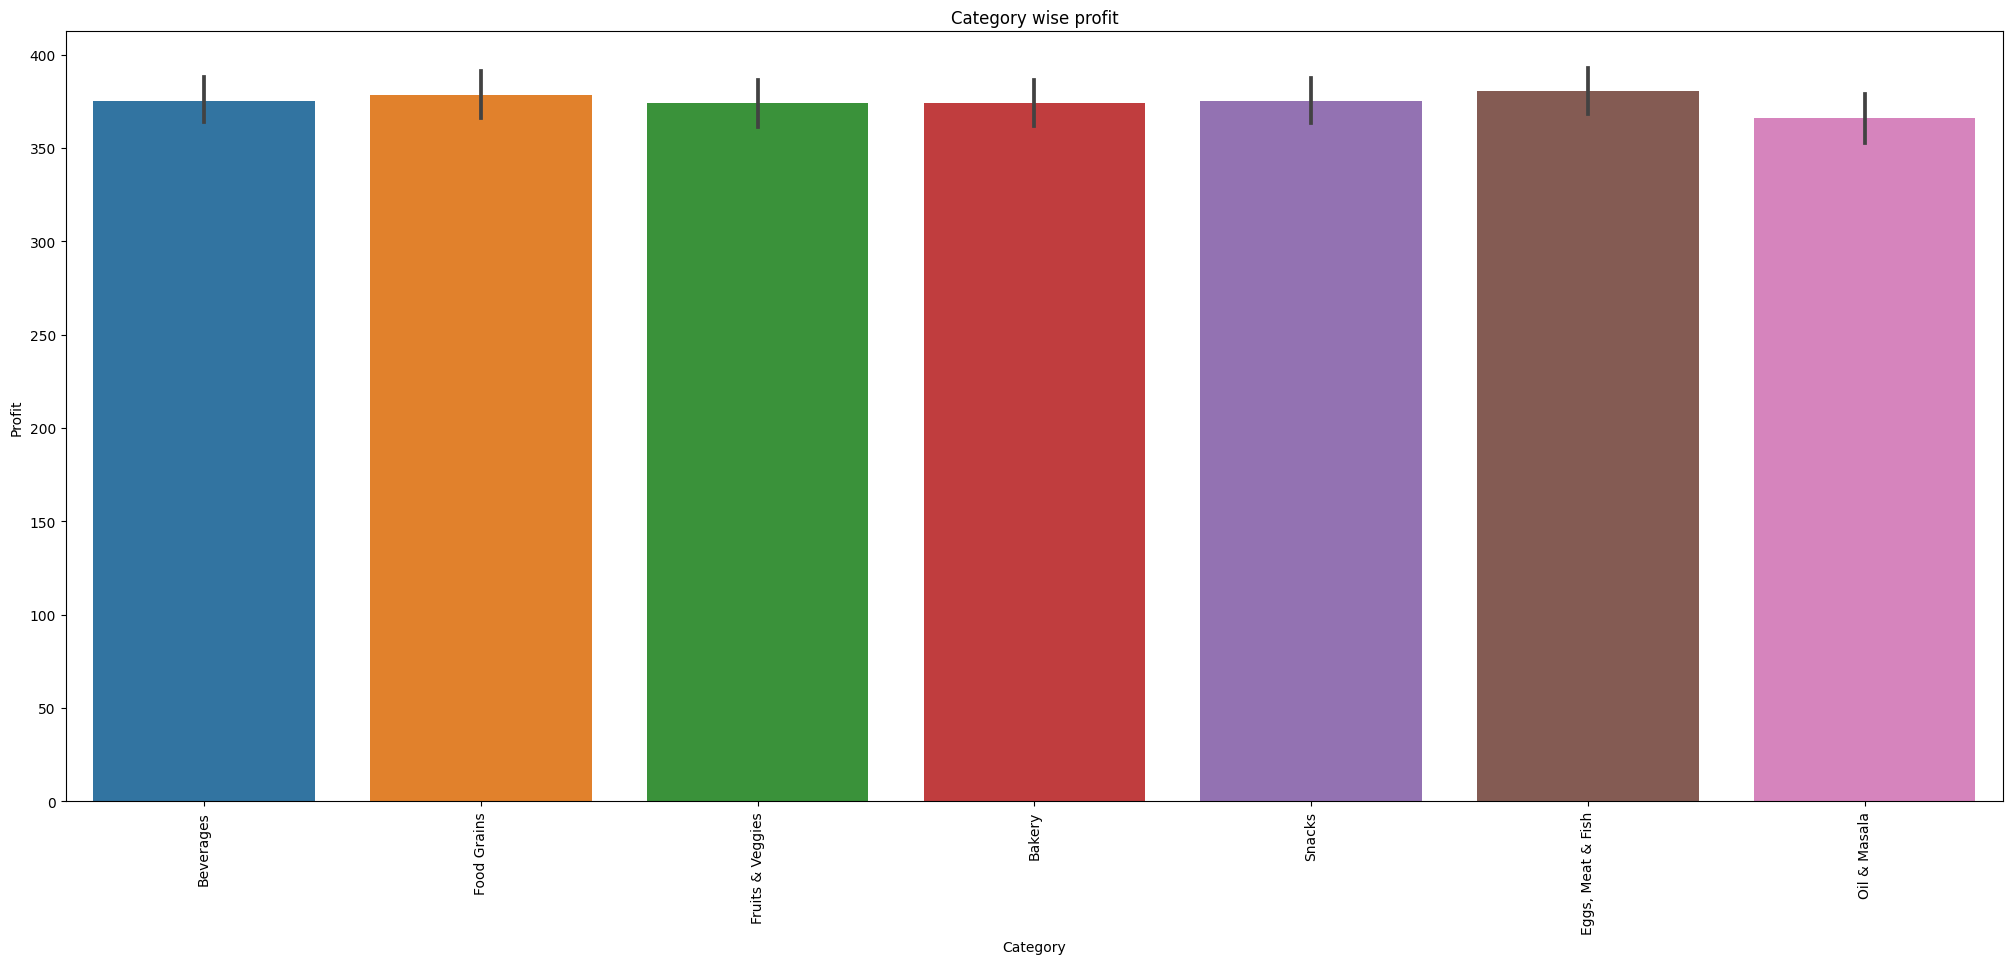

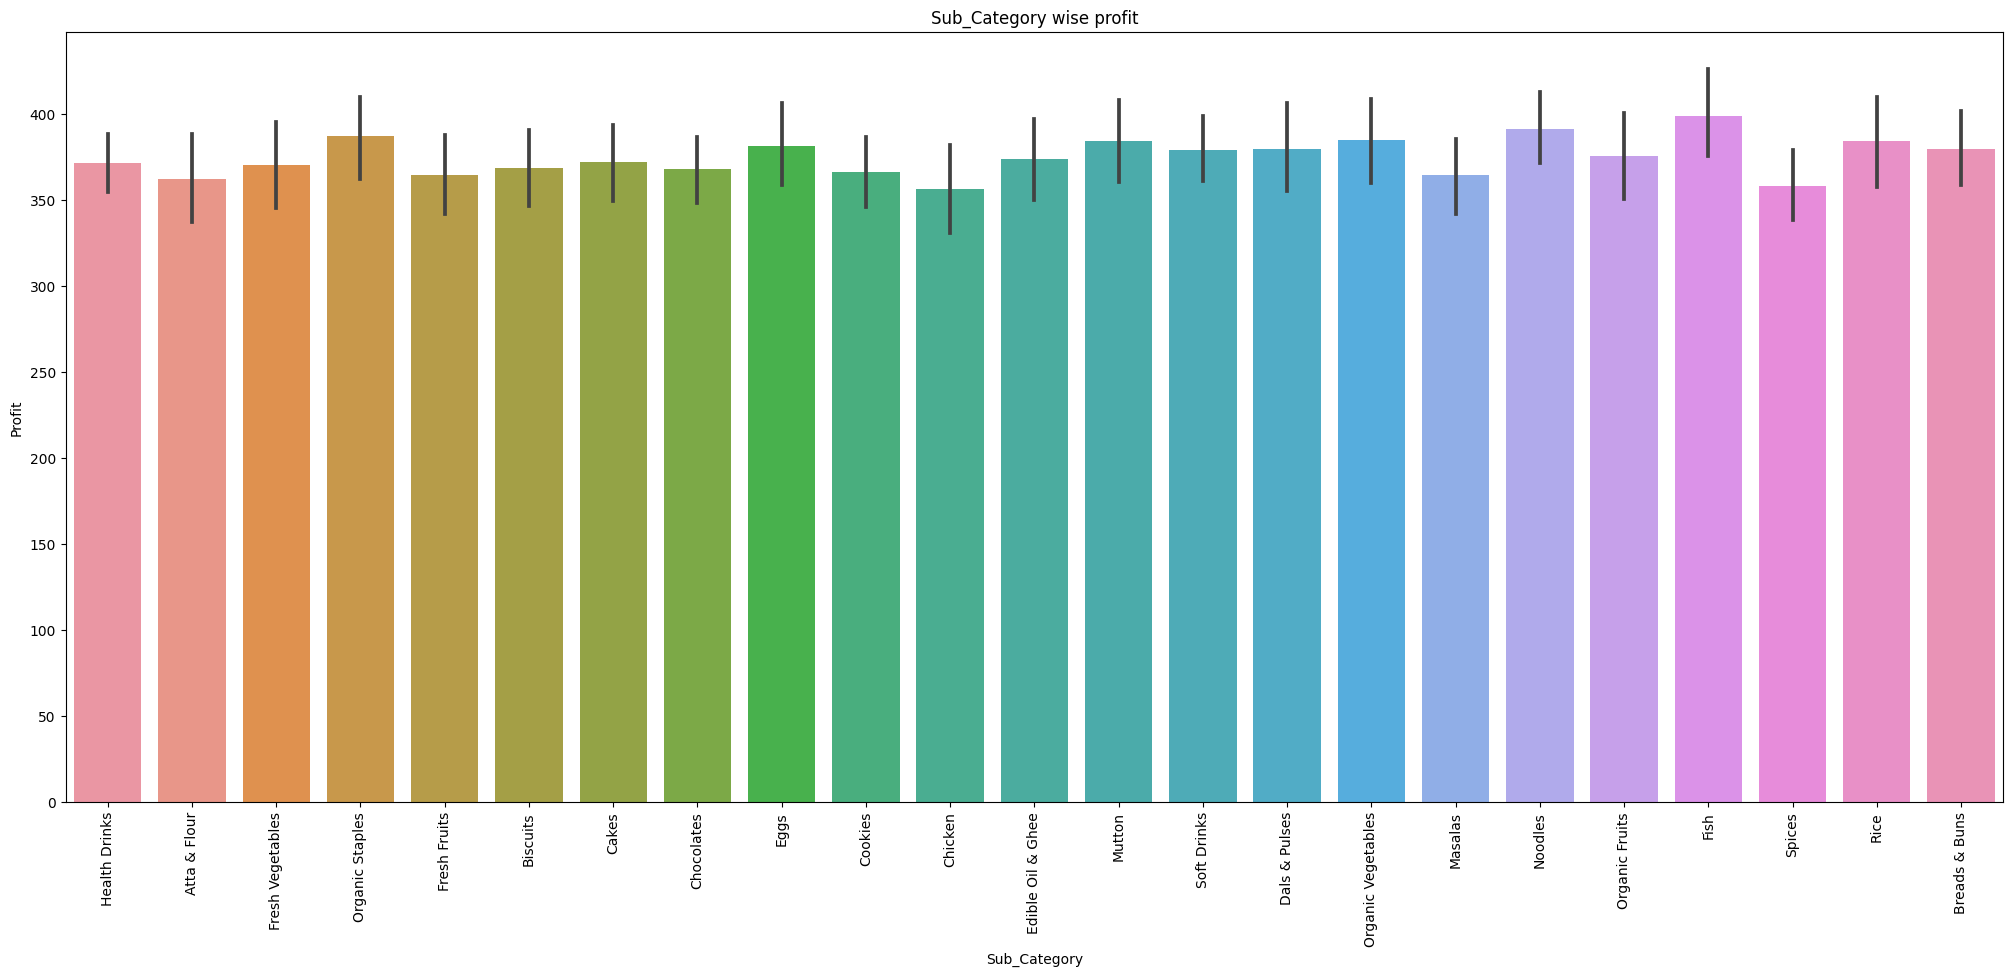

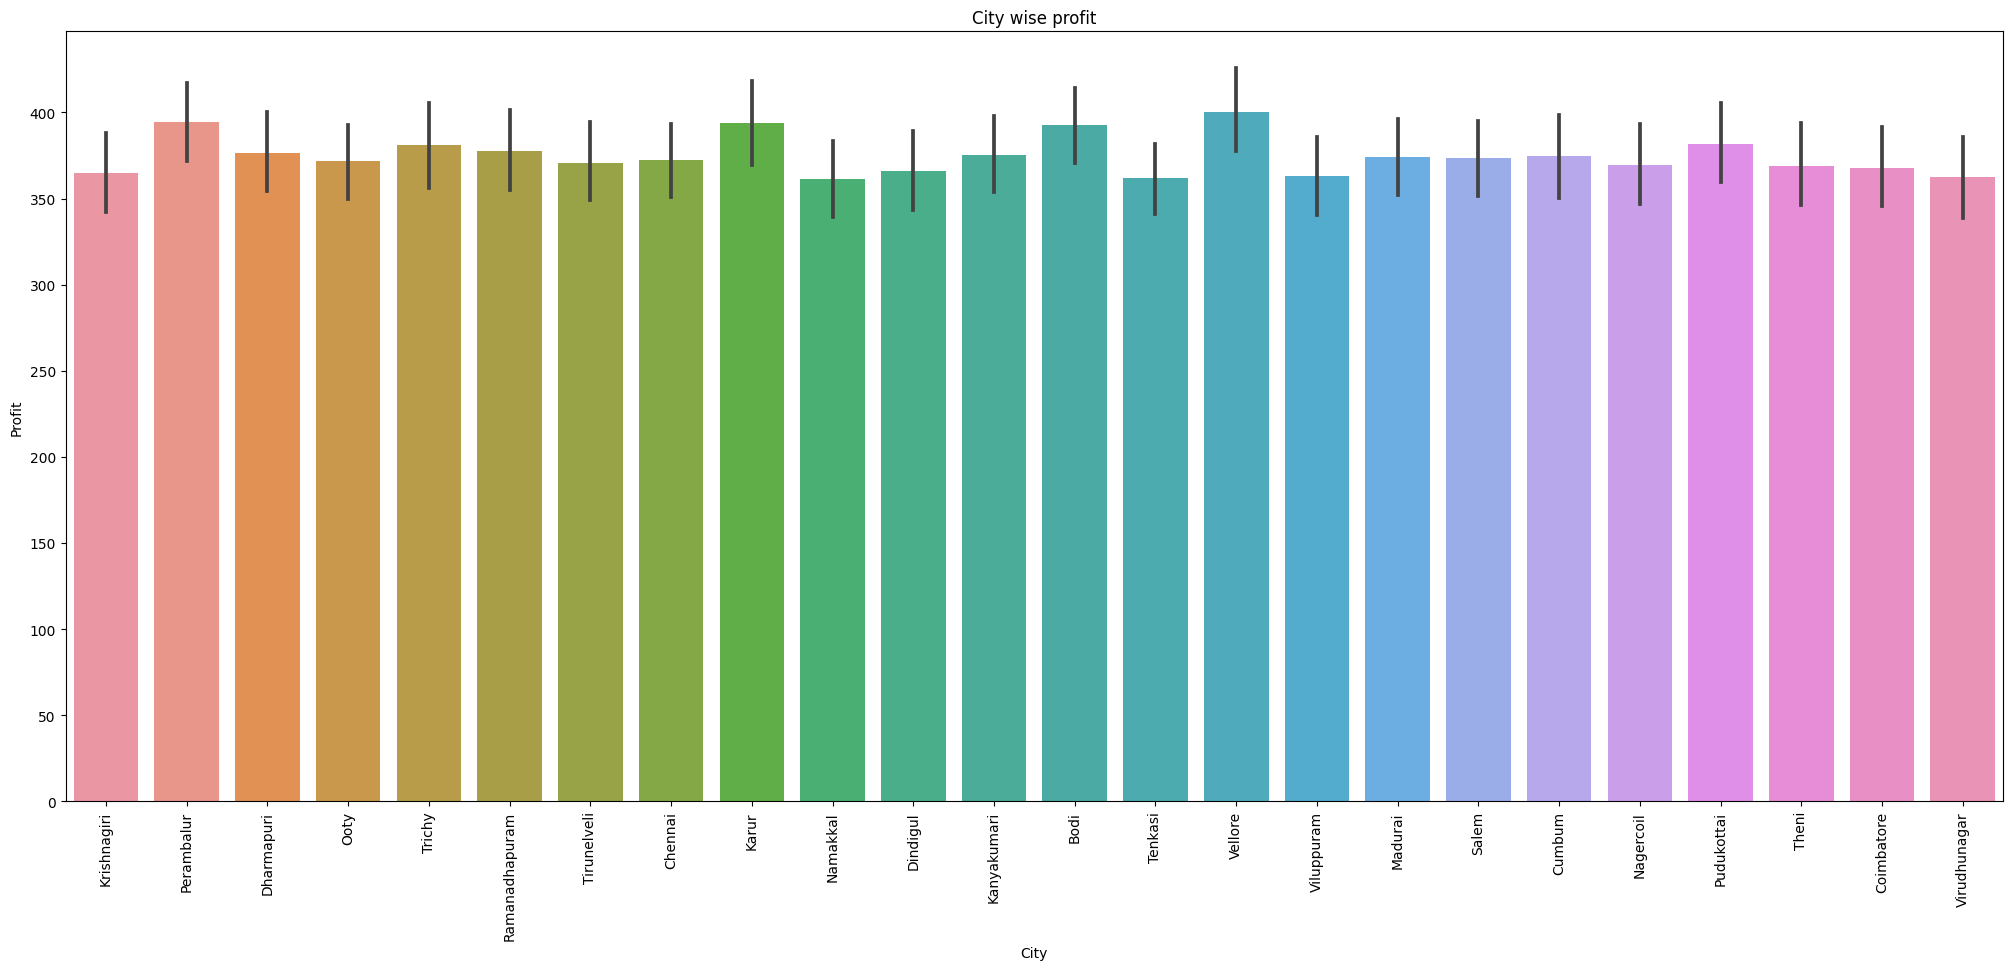

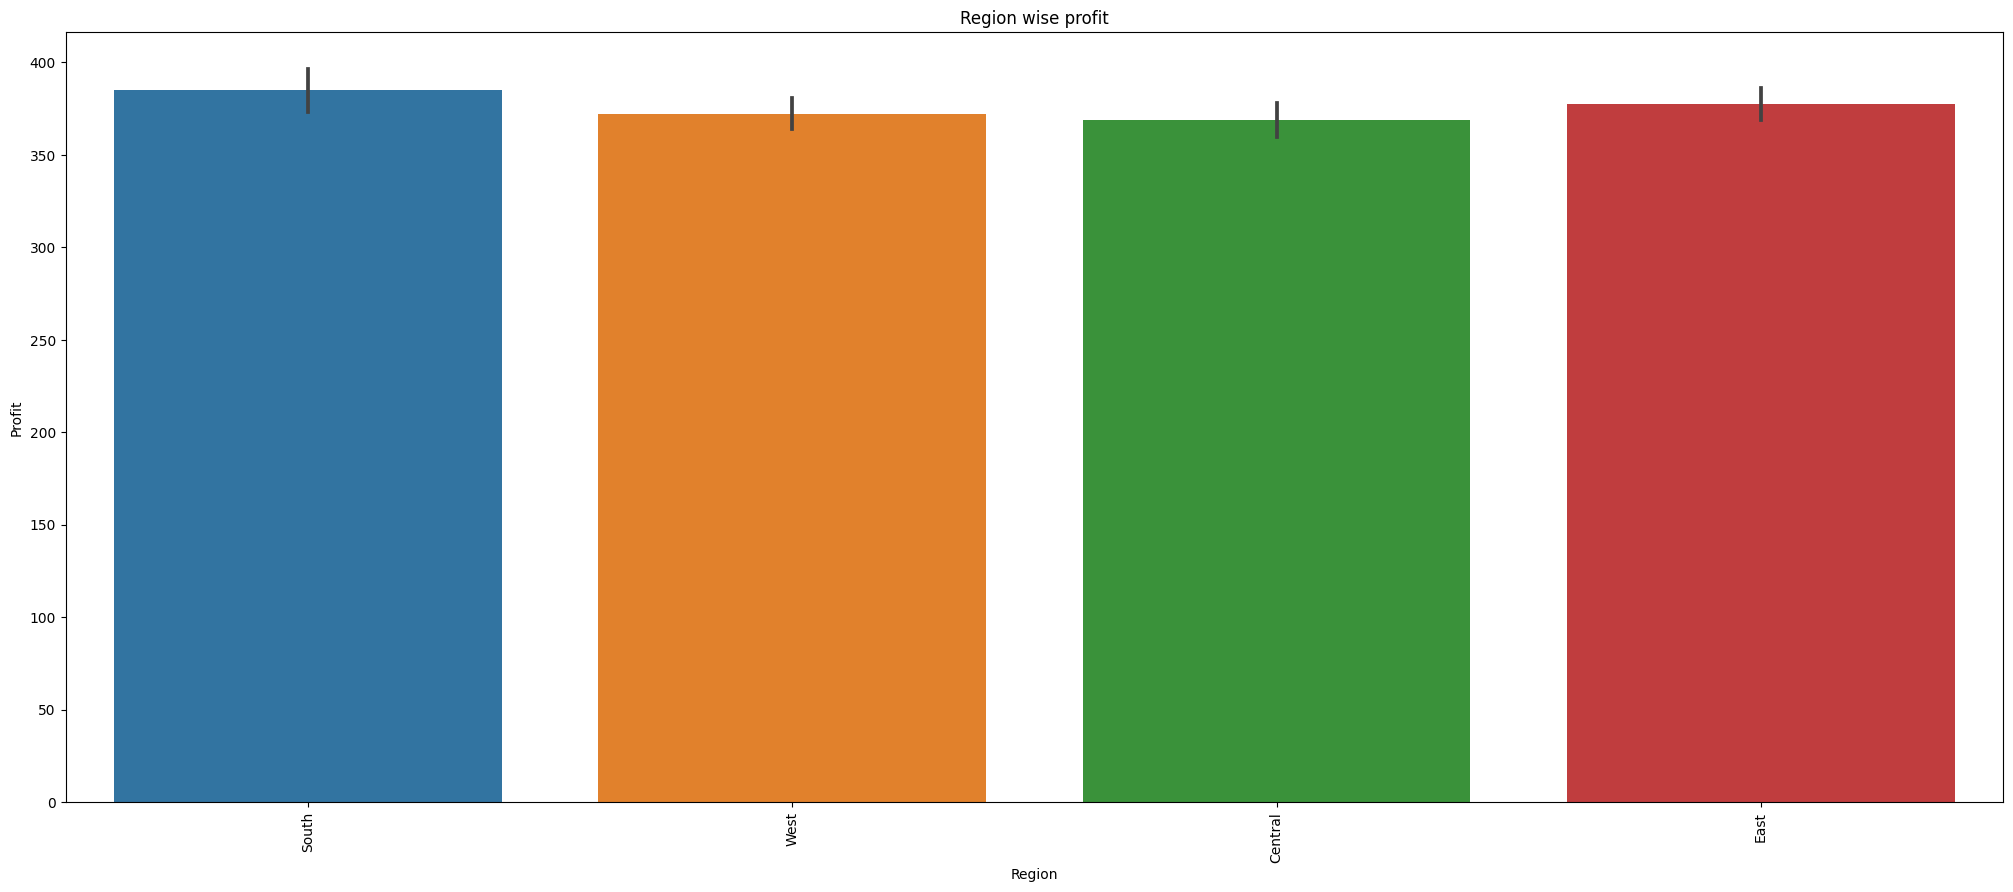

In [22]:
# profit count by categorical features
features=['Customer_Name','Category','Sub_Category','City','Region']
for i in features:
    plt.figure(figsize=(25,10))
    sns.barplot(x=df[i],y=df['Profit'])
    plt.title(f'{i} wise profit')
    plt.xticks(rotation=90)
    plt.show()

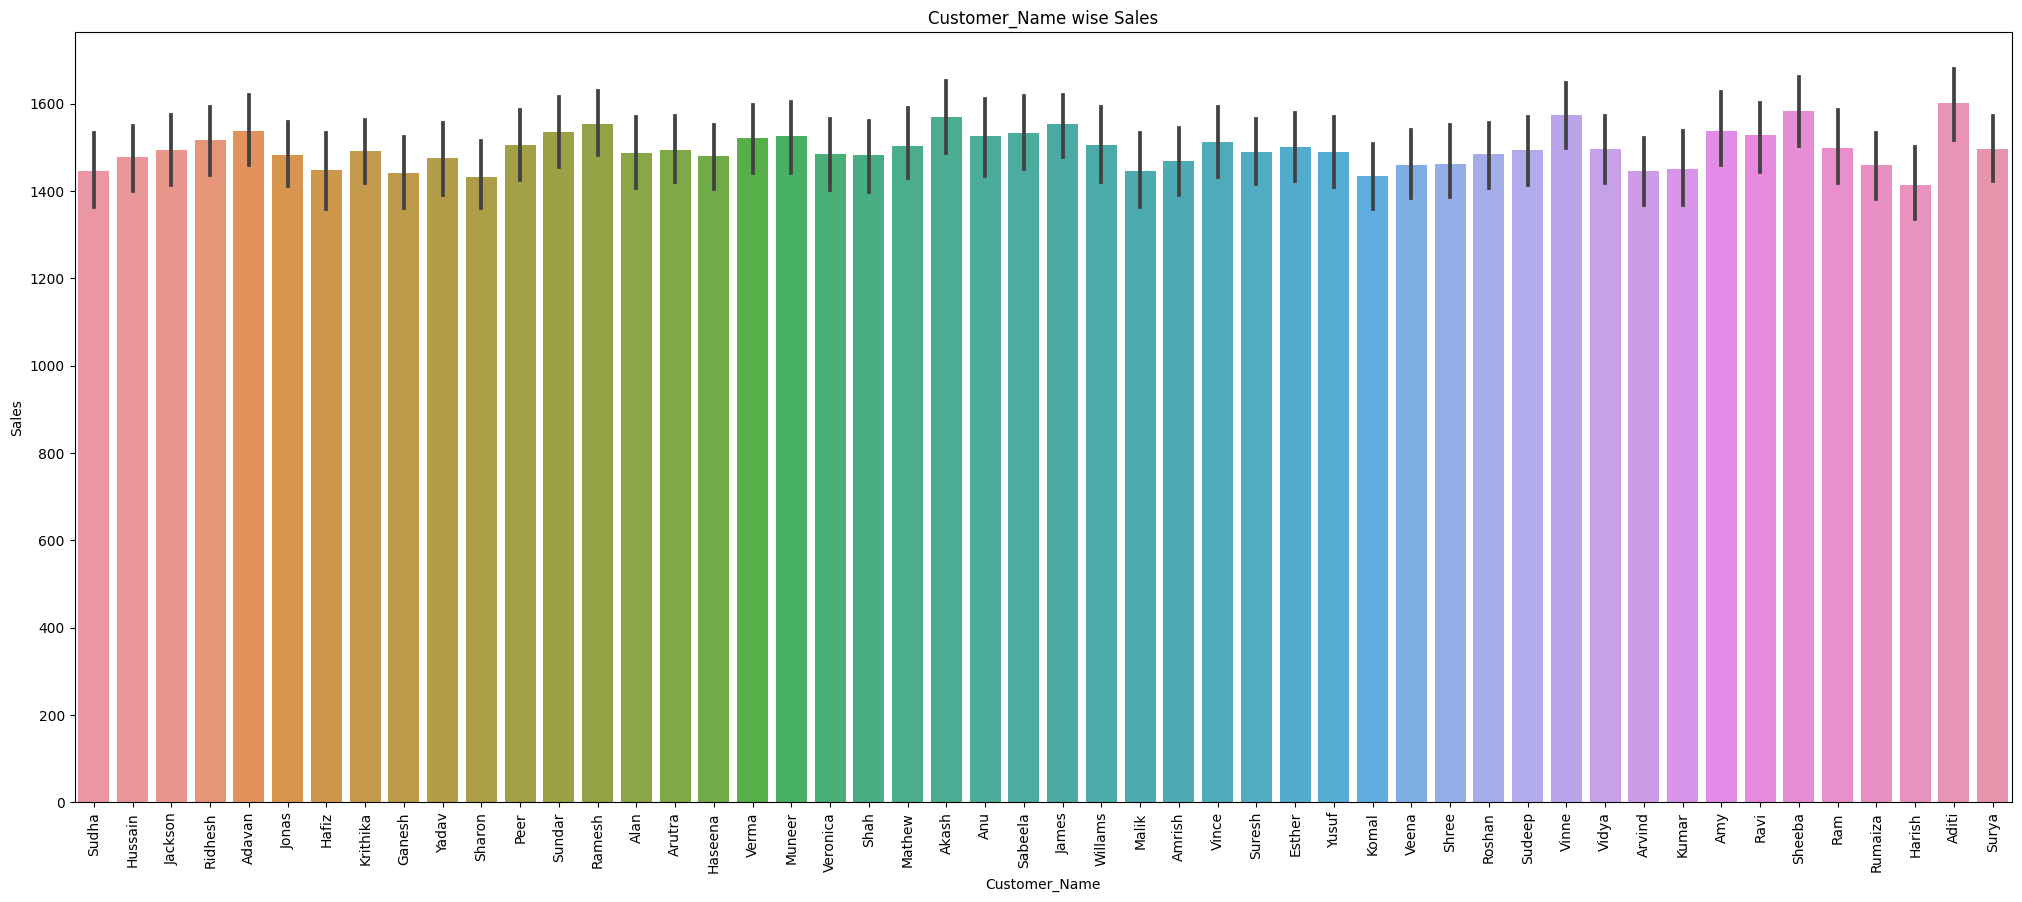

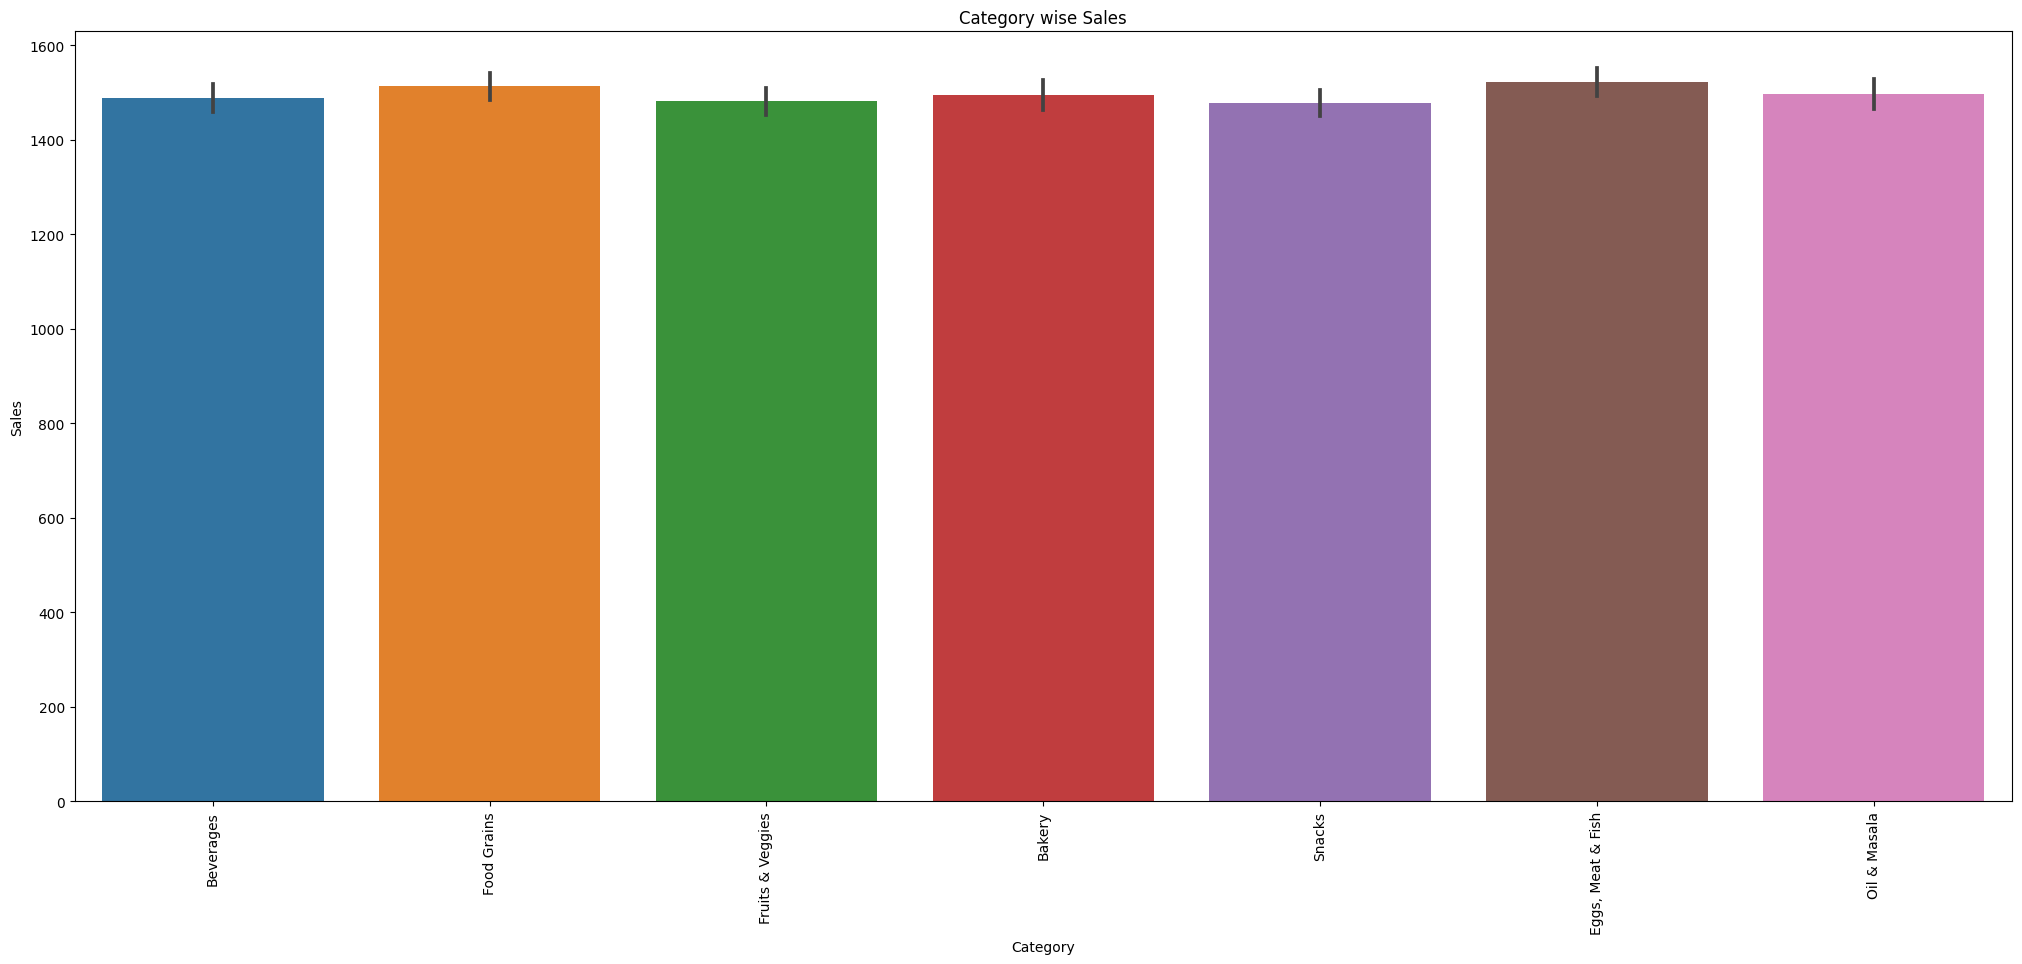

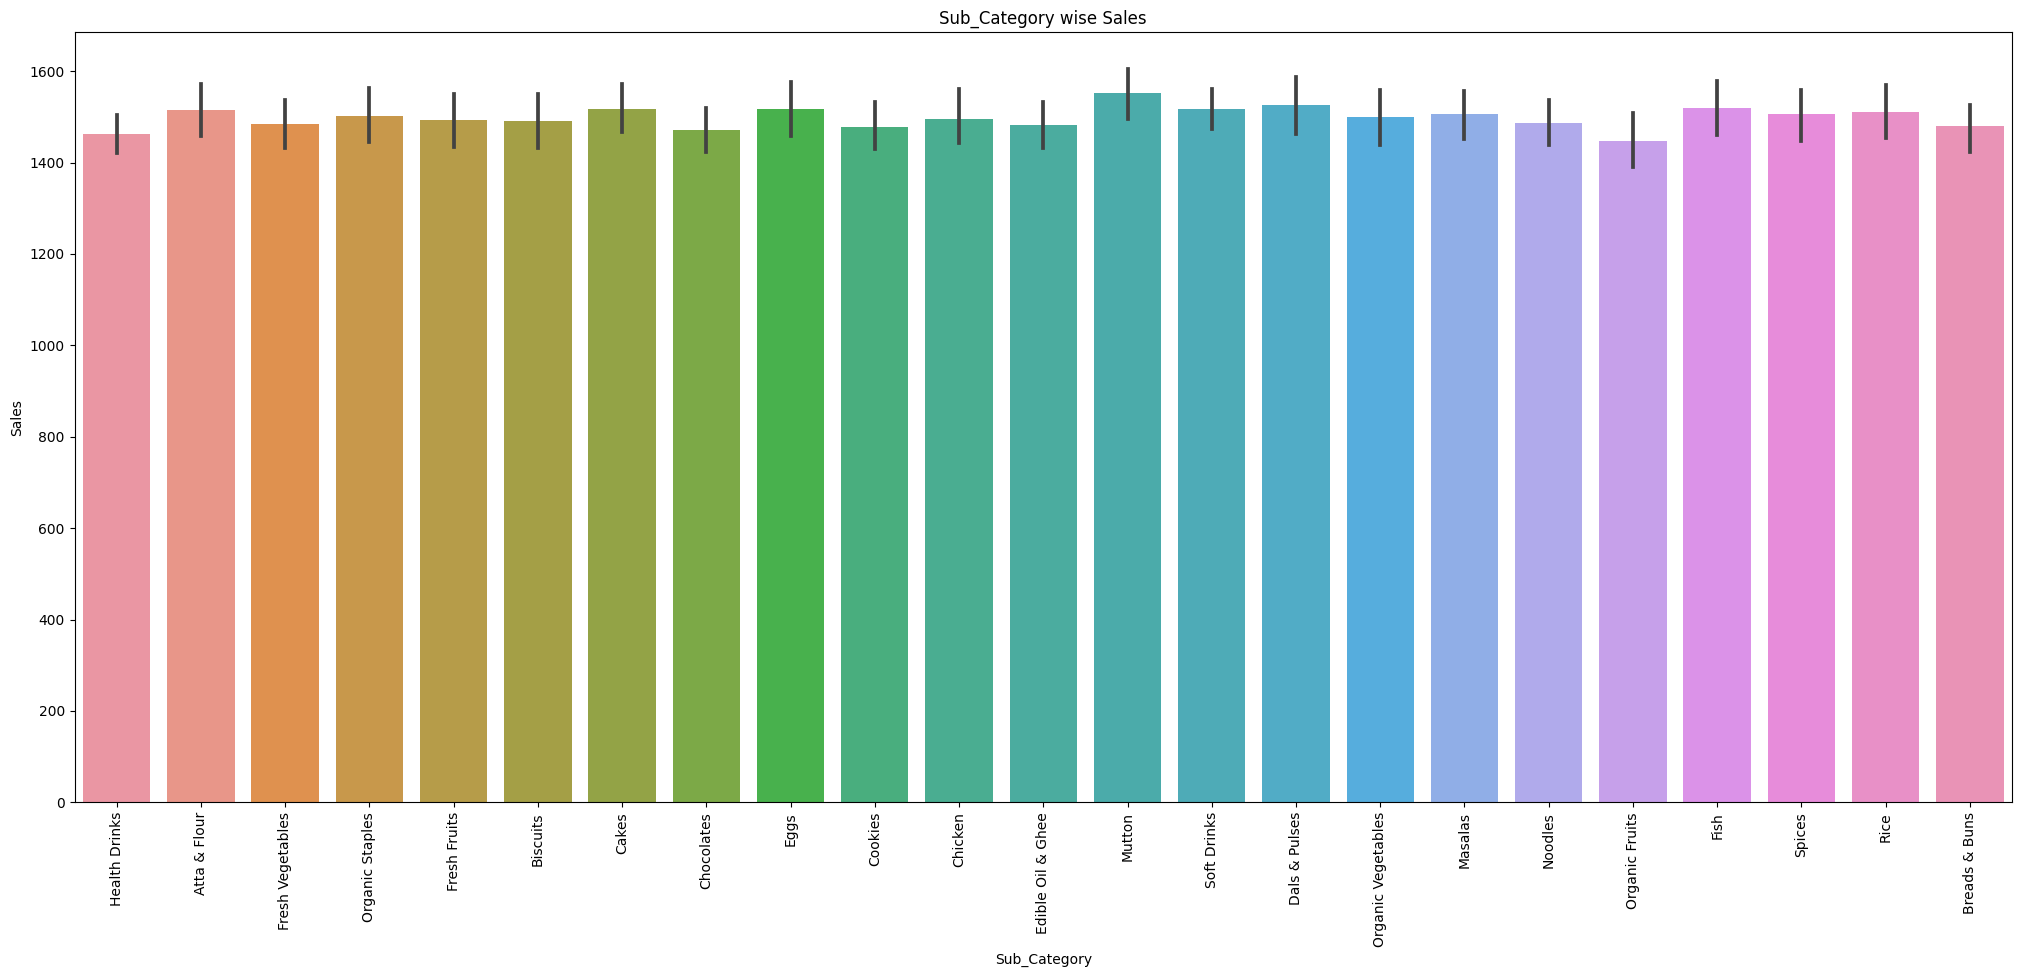

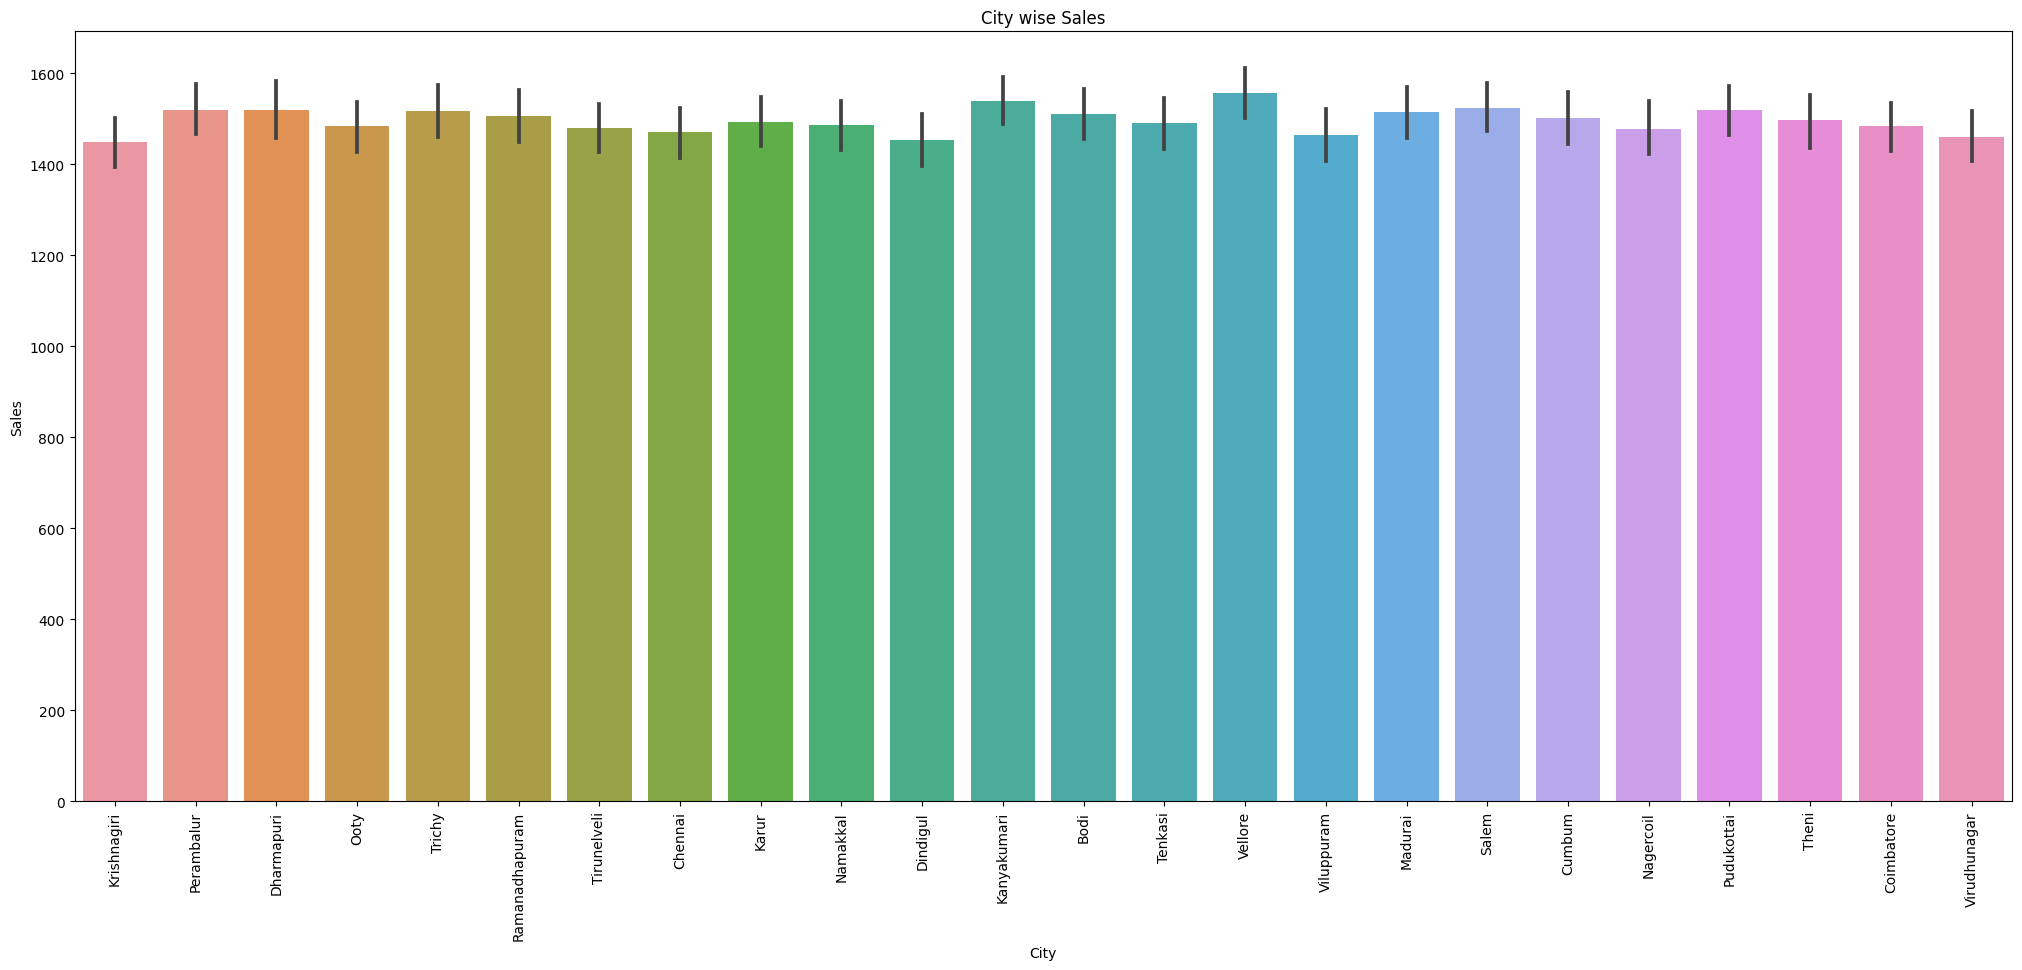

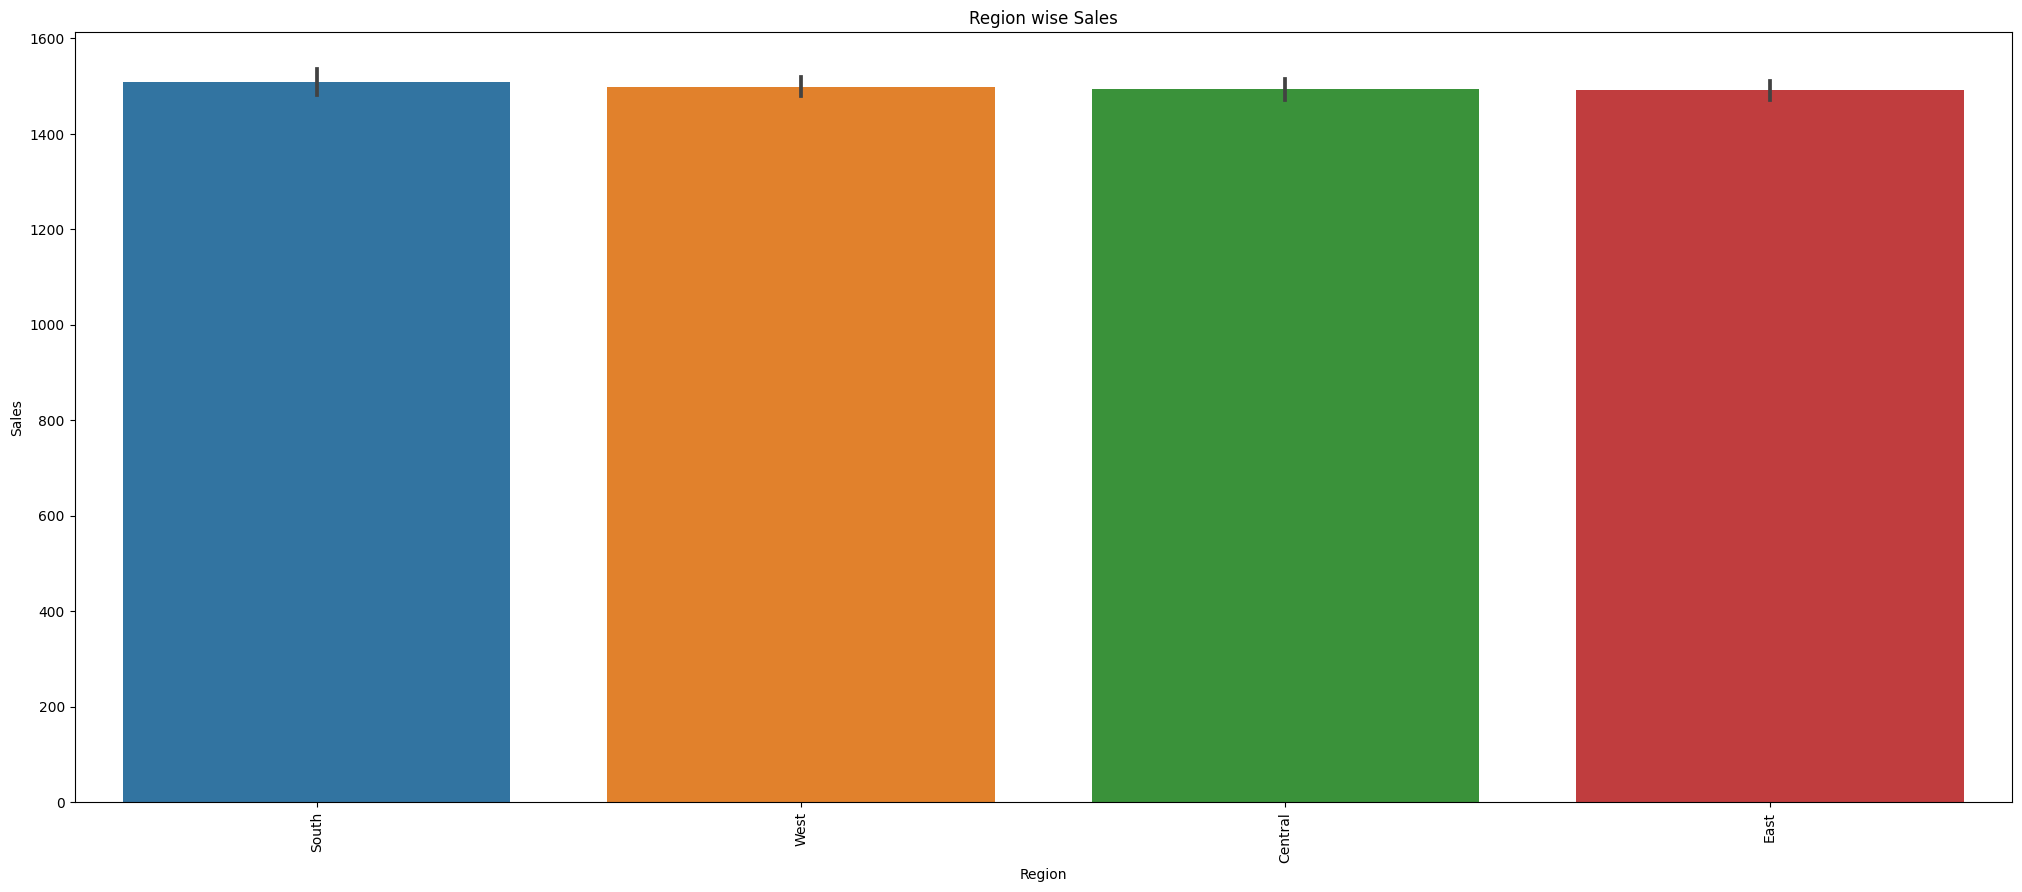

In [23]:
# sales count by categorical features
features=['Customer_Name','Category','Sub_Category','City','Region']
for i in features:
    plt.figure(figsize=(25,10))
    sns.barplot(x=df[i],y=df['Sales'])
    plt.title(f'{i} wise Sales')
    plt.xticks(rotation=90)
    plt.show()

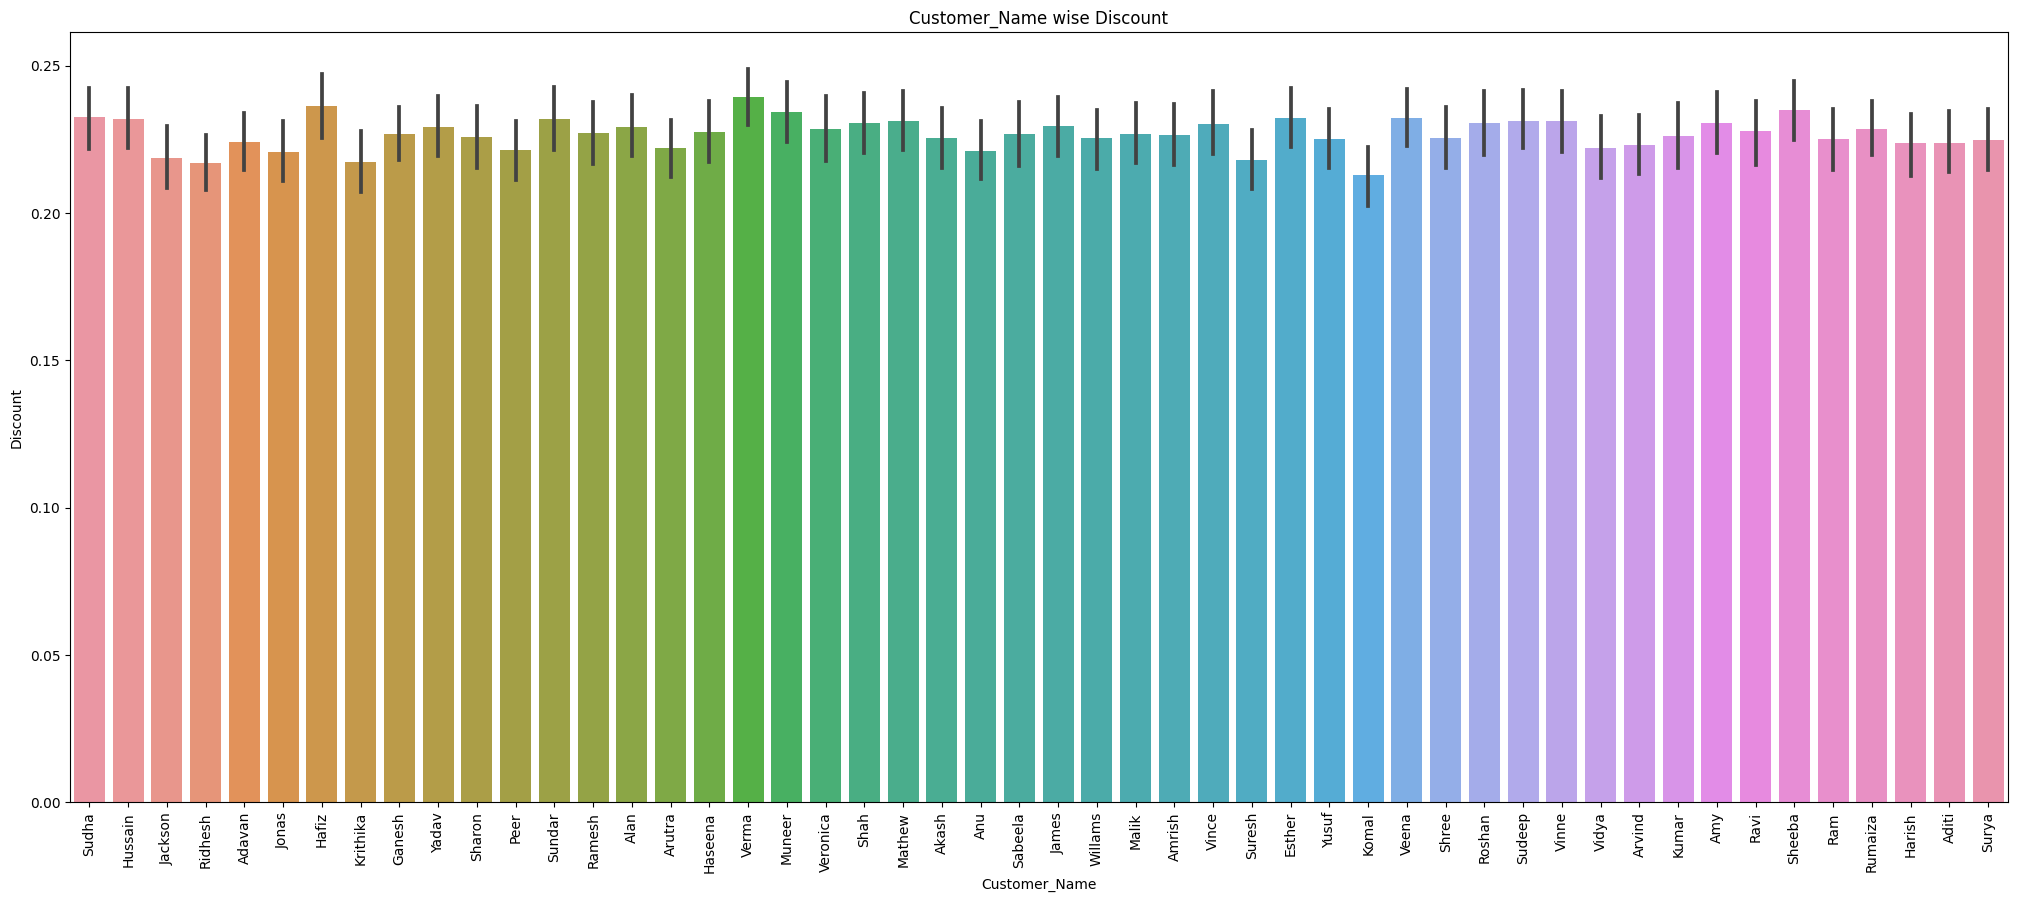

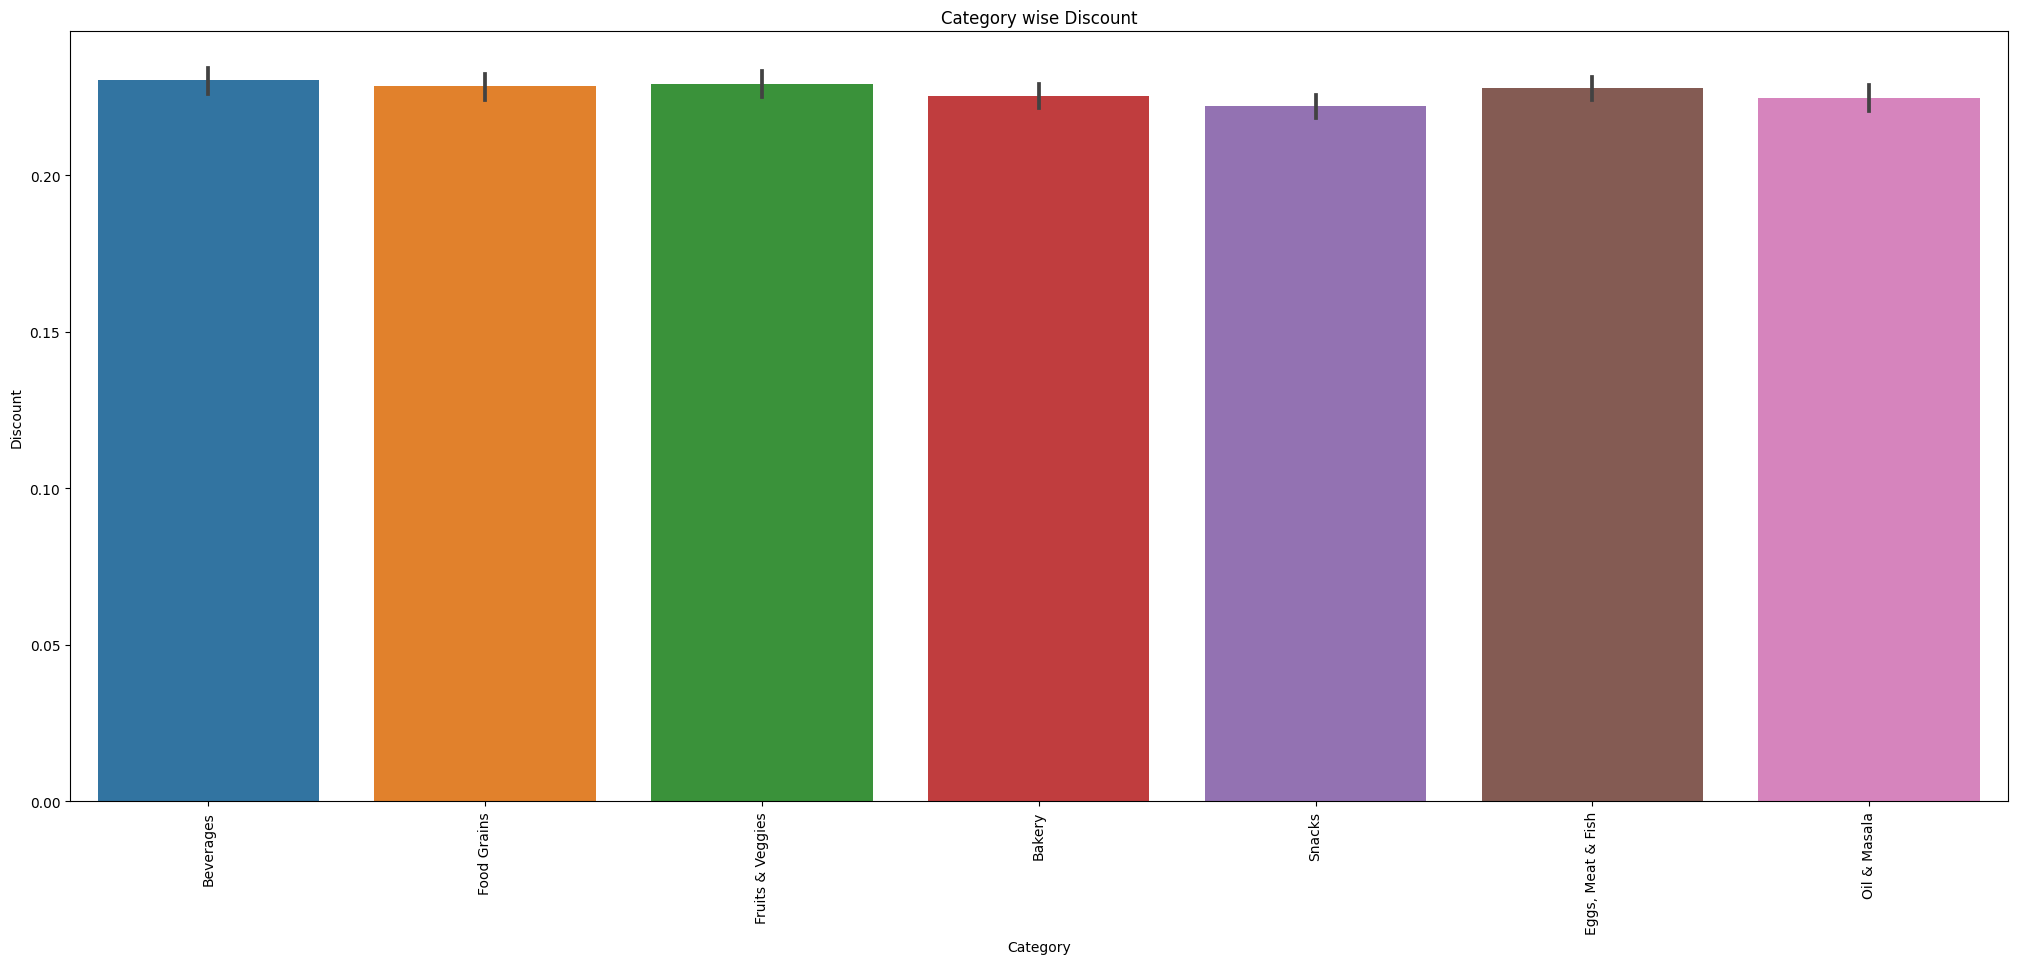

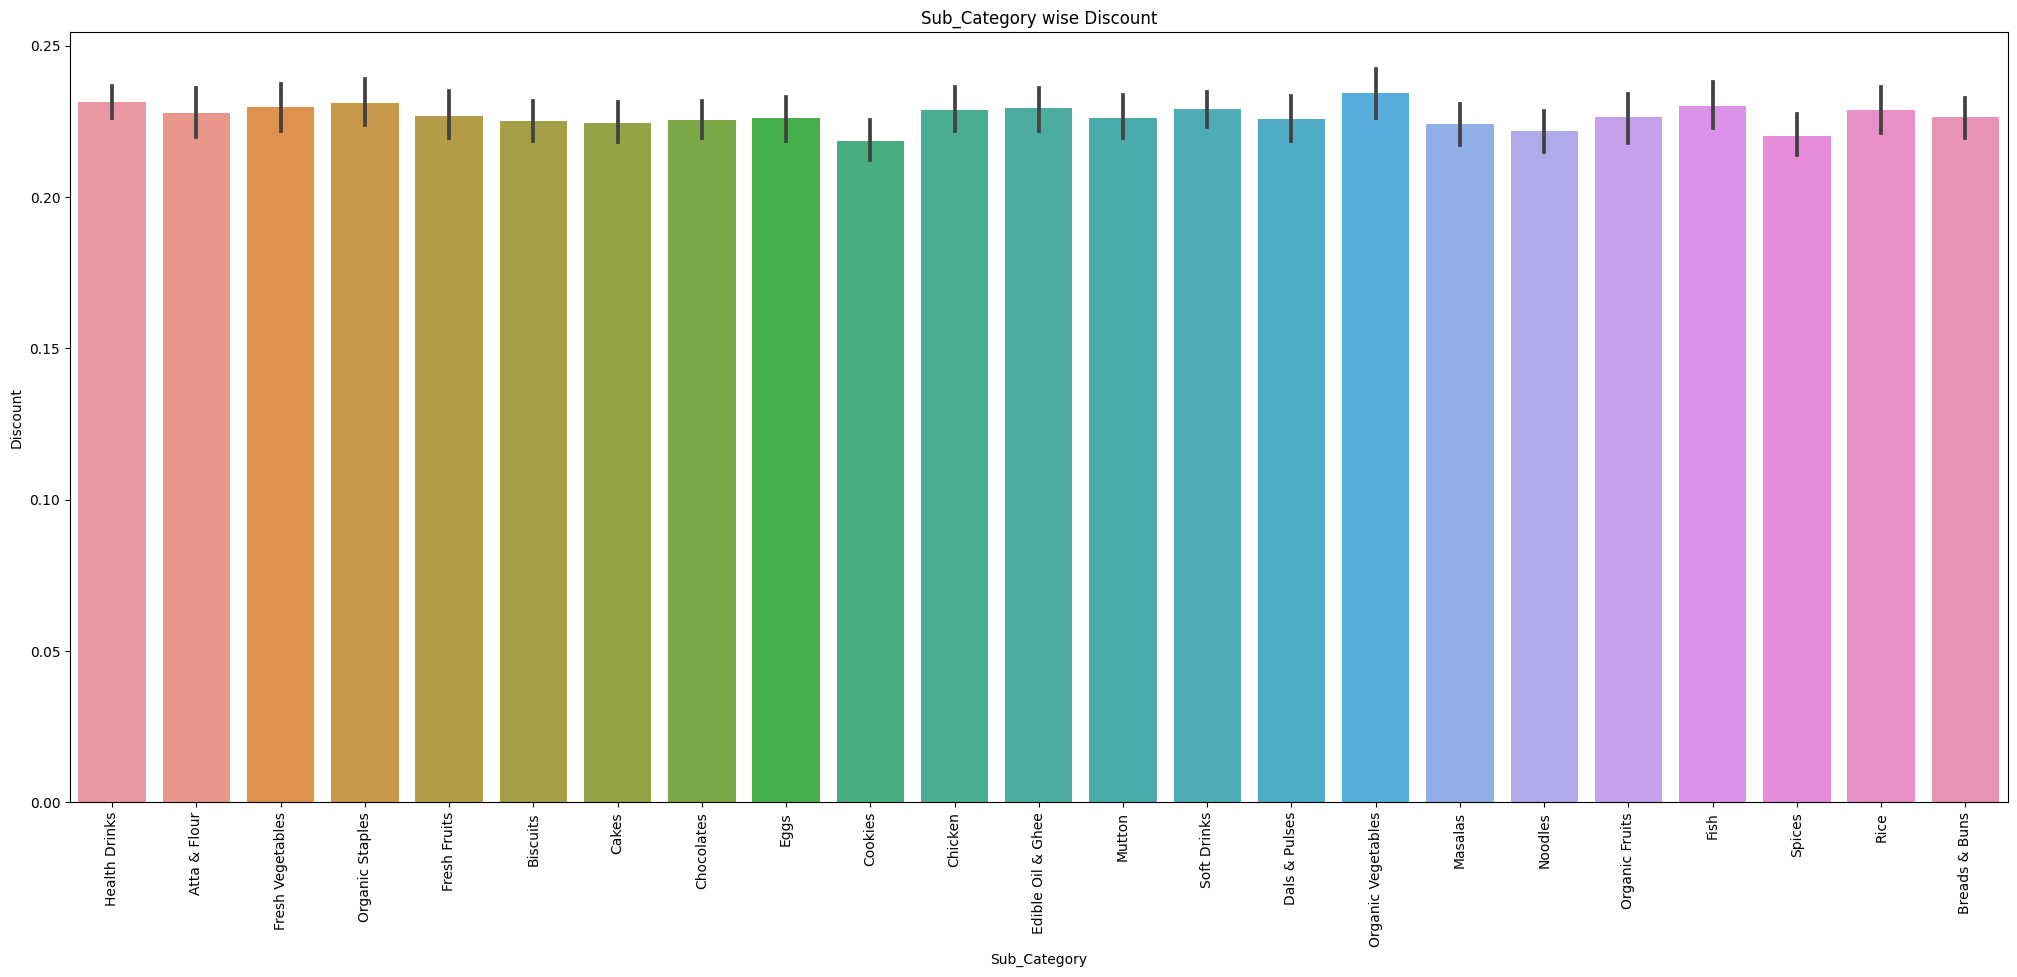

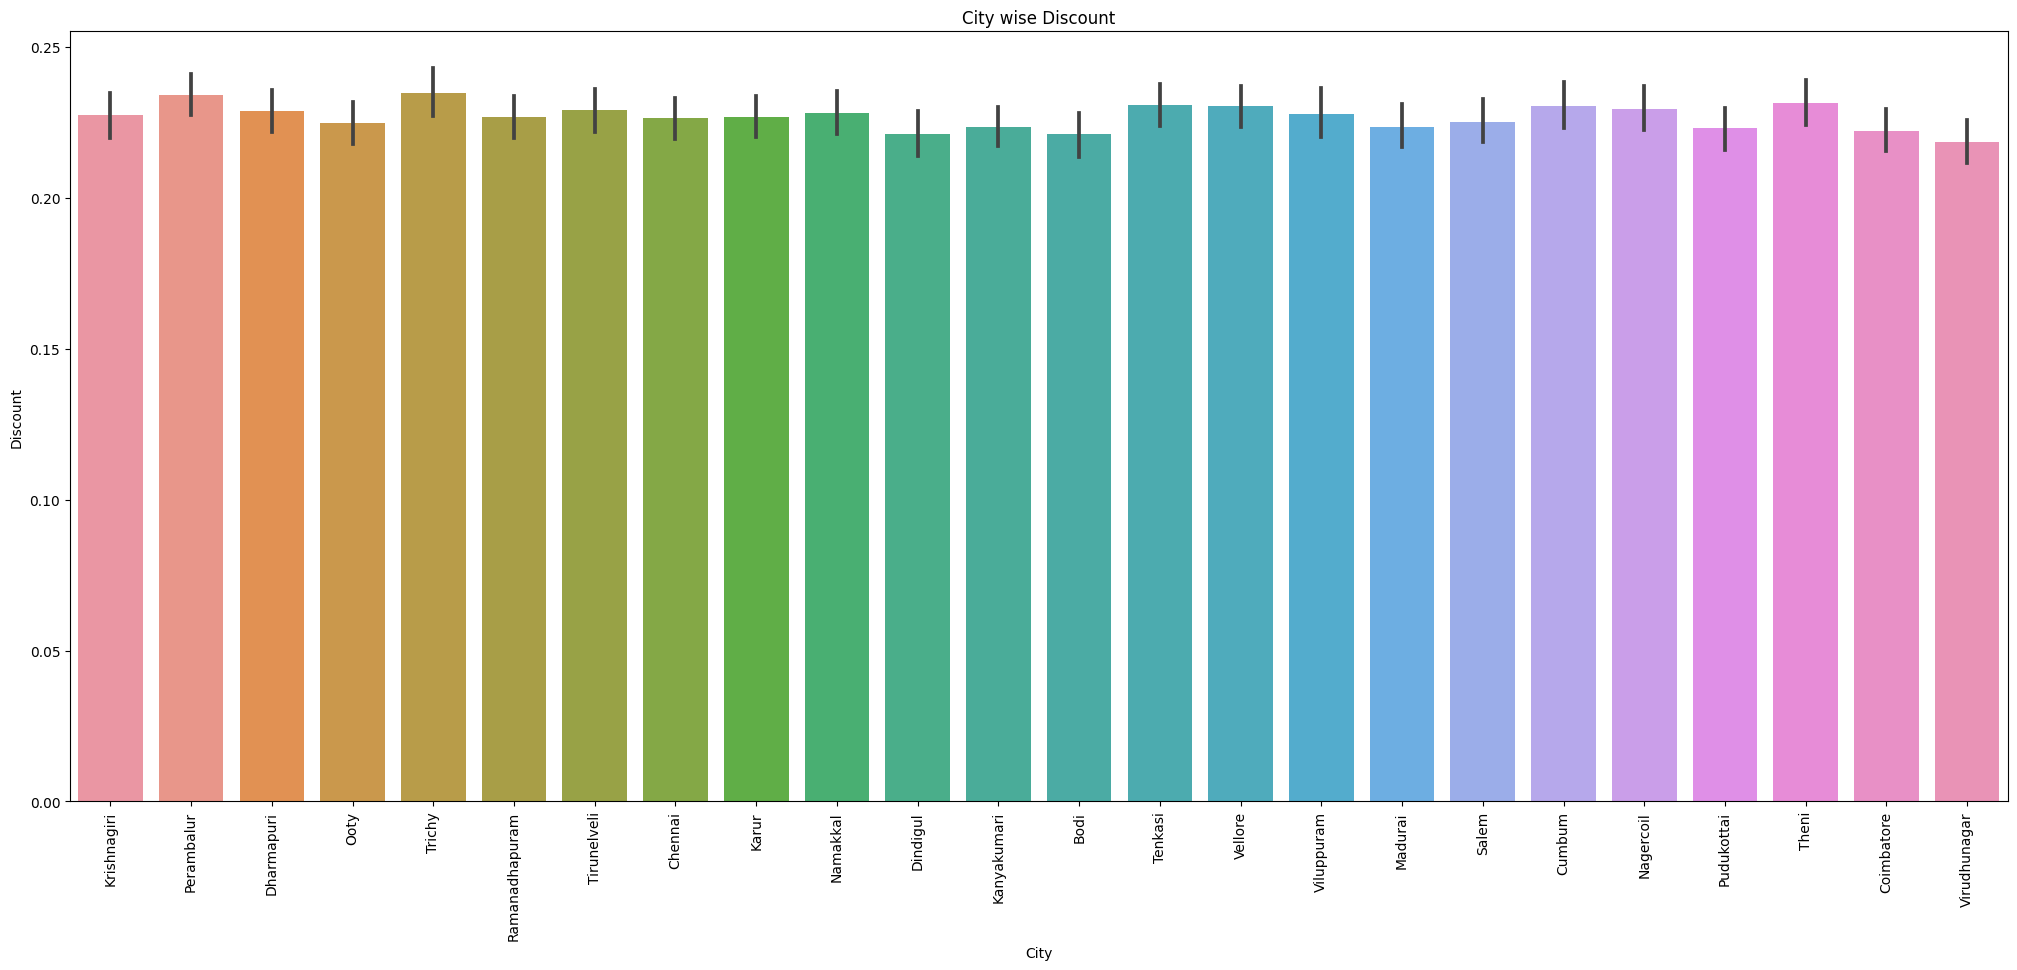

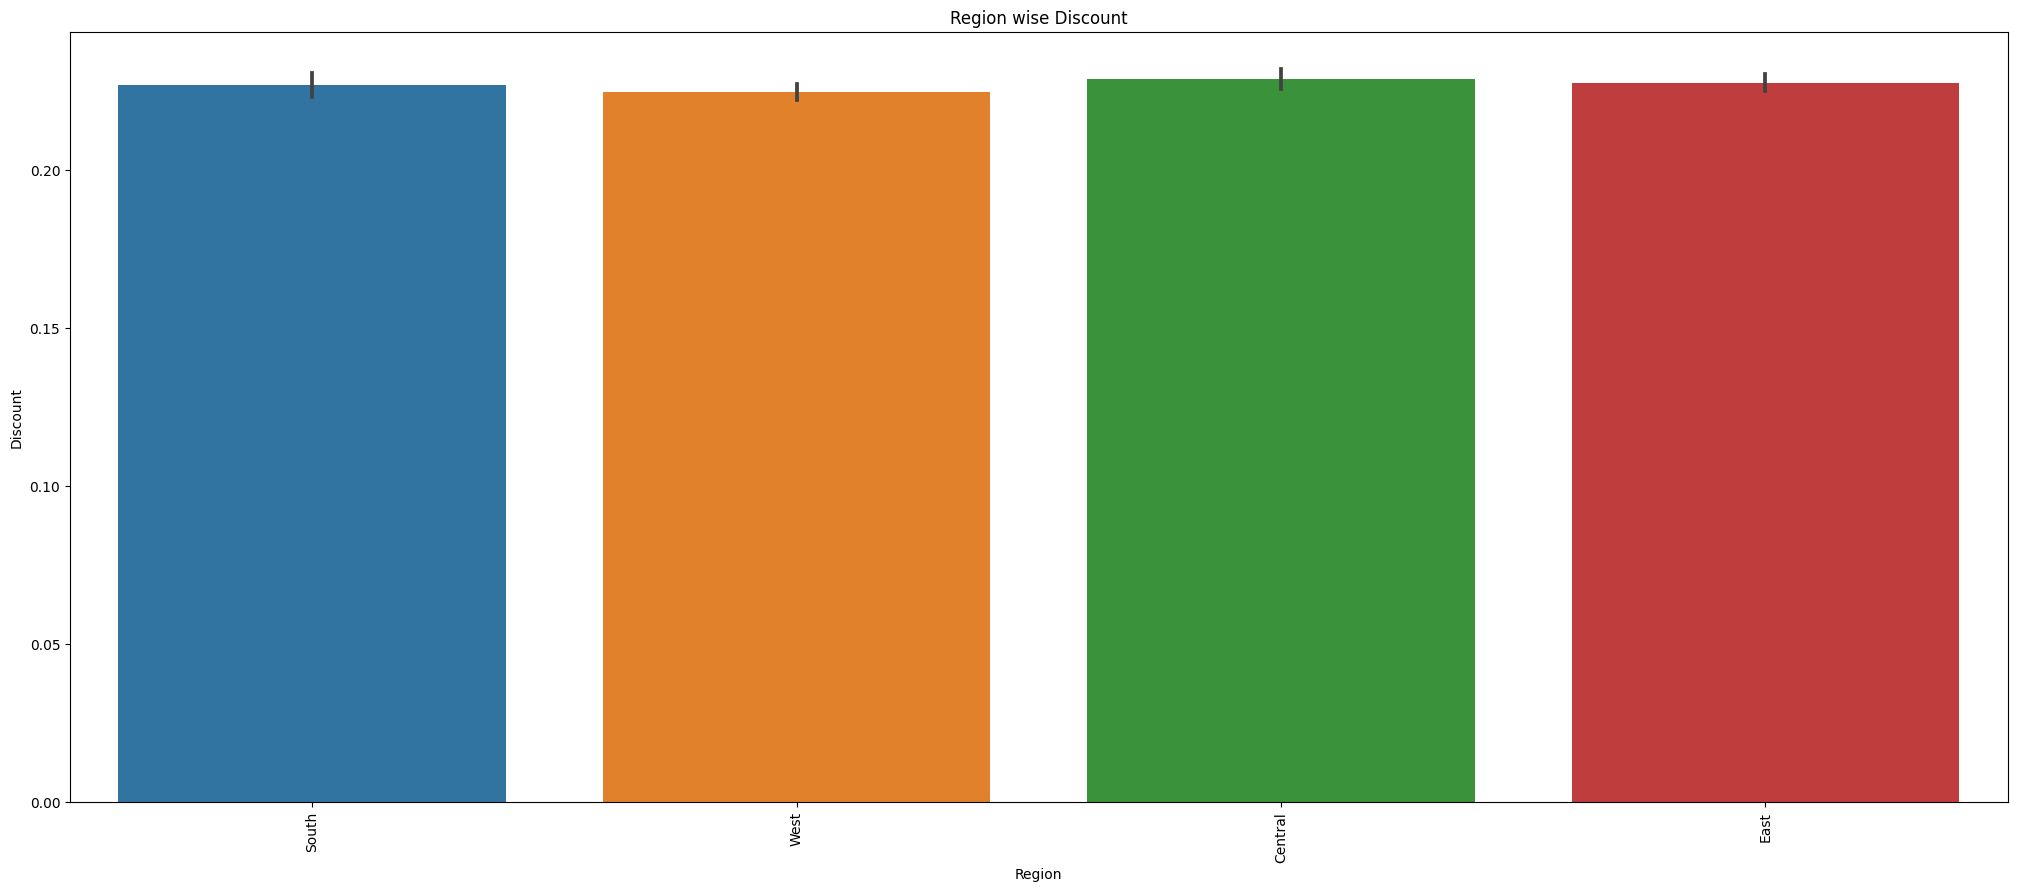

In [24]:
# discount by categorical features
features=['Customer_Name','Category','Sub_Category','City','Region']
for i in features:
    plt.figure(figsize=(25,10))
    sns.barplot(x=df[i],y=df['Discount'])
    plt.title(f'{i} wise Discount')
    plt.xticks(rotation=90)
    plt.show()

In [25]:
# values frequency by category, sub-category, city
freq=df[['Category','Sub_Category','City']].value_counts().reset_index()
freq=freq.rename(columns={'count':'Frequency'})
freq

,Category,Sub_Category,City,Frequency
0,Beverages,Soft Drinks,Perambalur,44
1,Beverages,Health Drinks,Ramanadhapuram,40
2,Beverages,Health Drinks,Chennai,39
3,Beverages,Soft Drinks,Tirunelveli,38
4,Beverages,Health Drinks,Ooty,38
...,...,...,...,...
547,Food Grains,Atta & Flour,Trichy,7
548,Fruits & Veggies,Organic Vegetables,Ramanadhapuram,7
549,Fruits & Veggies,Fresh Fruits,Madurai,7
550,"Eggs, Meat & Fish",Fish,Viluppuram,5


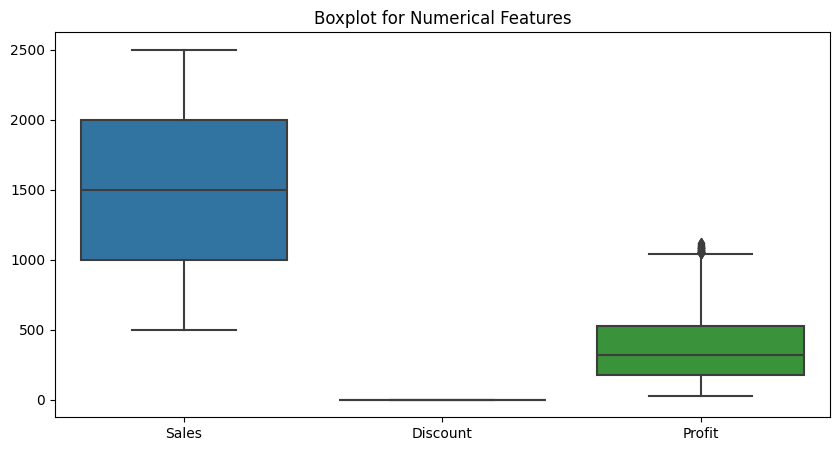

In [26]:
# boxplot for numerical variables
numerical_features=df.select_dtypes(['int64','float64'])
plt.figure(figsize=(10,5))
sns.boxplot(data=numerical_features)
plt.title('Boxplot for Numerical Features')
plt.show()

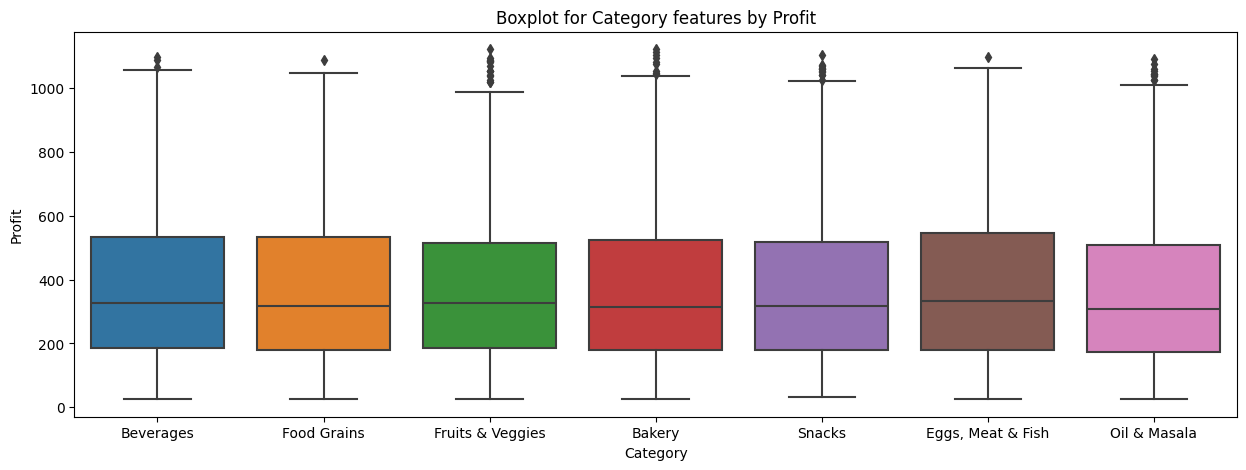

In [27]:
# boxplot for category 
plt.figure(figsize=(15,5))
sns.boxplot(x='Category',y='Profit',data=df)
plt.title('Boxplot for Category features by Profit')
plt.show()

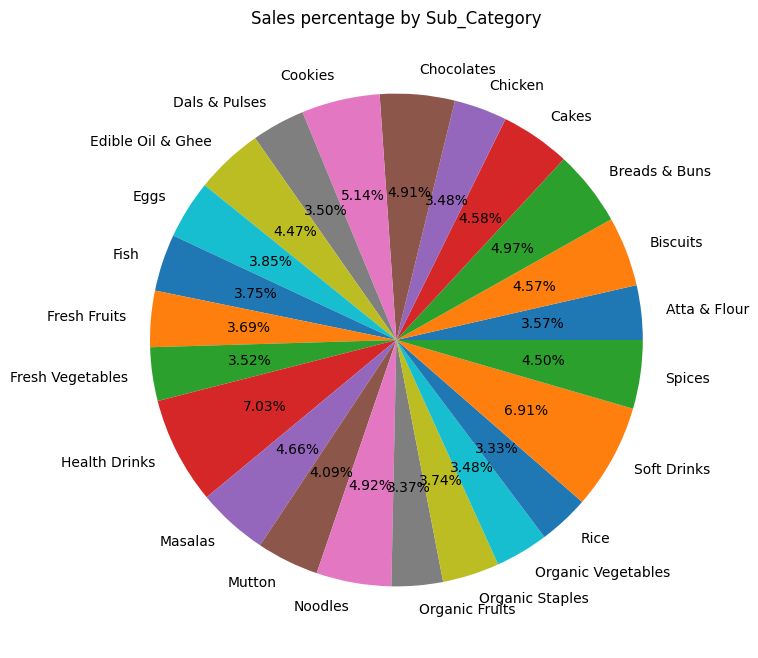

In [28]:
# sales percentage by sub-category
sub_pie=df.groupby('Sub_Category')['Sales'].sum().reset_index()
plt.figure(figsize=(20,8))
plt.pie(sub_pie['Sales'],labels=sub_pie['Sub_Category'],autopct='%1.2f%%')
plt.title('Sales percentage by Sub_Category')
plt.show()

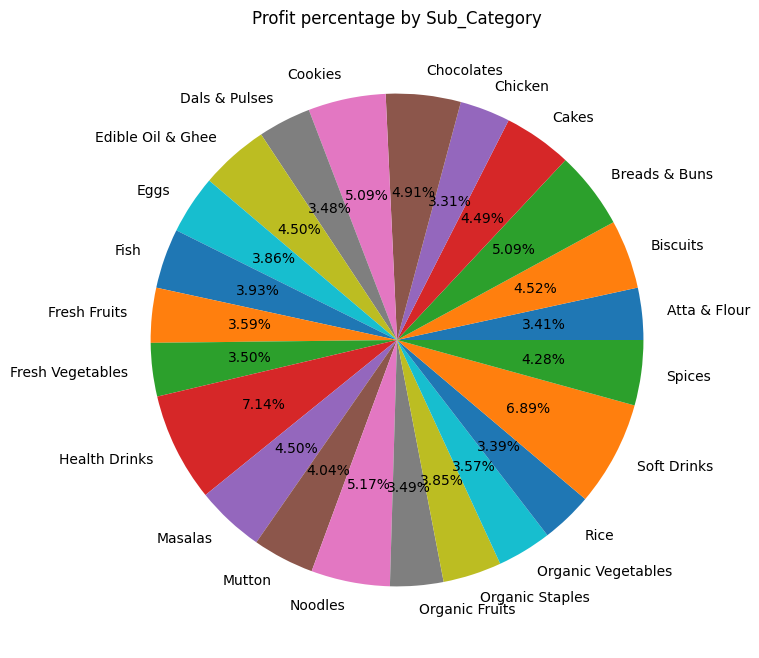

In [29]:
# profit percentage by sub_category
sub_pie=df.groupby('Sub_Category')['Profit'].sum().reset_index()
plt.figure(figsize=(20,8))
plt.pie(sub_pie['Profit'],labels=sub_pie['Sub_Category'],autopct='%1.2f%%')
plt.title('Profit percentage by Sub_Category')
plt.show()

In [30]:
# Total sales and profit by category, sub-category
sub_category=df.groupby(['Category','Sub_Category'])[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
sub_category

Sales     Profit
Category          Sub_Category                          
Beverages         Health Drinks       1051439  267469.79
                  Soft Drinks         1033874  258135.97
Snacks            Noodles              735435  193685.81
Bakery            Breads & Buns        742586  190764.98
Snacks            Cookies              768213  190643.70
                  Chocolates           733898  183849.34
Bakery            Biscuits             684083  169357.62
Oil & Masala      Masalas              696226  168597.83
                  Edible Oil & Ghee    668086  168593.58
Bakery            Cakes                685612  168398.46
Oil & Masala      Spices               672876  160302.60
Eggs, Meat & Fish Mutton               611200  151389.40
                  Fish                 560548  147248.01
                  Eggs                 575156  144669.92
Food Grains       Organic Staples      558929  144136.89
Fruits & Veggies  Fresh Fruits         551212  134668.35
                  Organic Vegetables   520271  133596.37
                  Fresh Vegetables     525842  131273.33
                  Organic Fruits       503402  130862.33
Food Grains       Dals & Pulses        523371  130232.29
                  Atta & Flour         534649  127861.10
                  Rice                 498323  126932.36
Eggs, Meat & Fish Chicken              520497  124049.89

In [31]:
# sales and profit by category
category_s_p=df.groupby('Category')[['Sales','Profit']].sum().reset_index().sort_values(by='Profit',ascending=False)
category_s_p

,Category,Sales,Profit
6,Snacks,2237546,568178.85
2,"Eggs, Meat & Fish",2267401,567357.22
4,Fruits & Veggies,2100727,530400.38
3,Food Grains,2115272,529162.64
0,Bakery,2112281,528521.06
1,Beverages,2085313,525605.76
5,Oil & Masala,2037188,497494.01


We can calculate the total sales and Profit for each category, and create visualizations such as bar charts or pie charts to display the sales data.

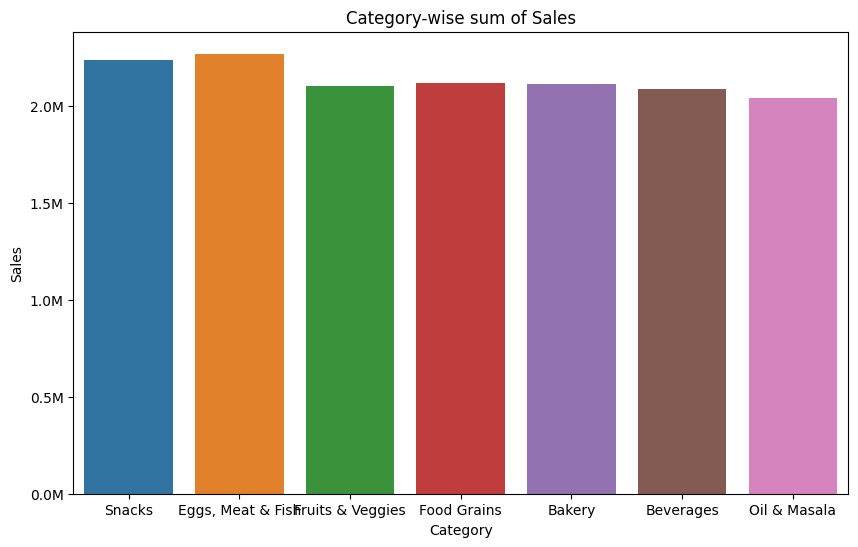

In [32]:
# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x*1e-6:.1f}M'

# Create the plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=category_s_p['Category'], y=category_s_p['Sales'])

# Set axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Category-wise sum of Sales')
plt.show()

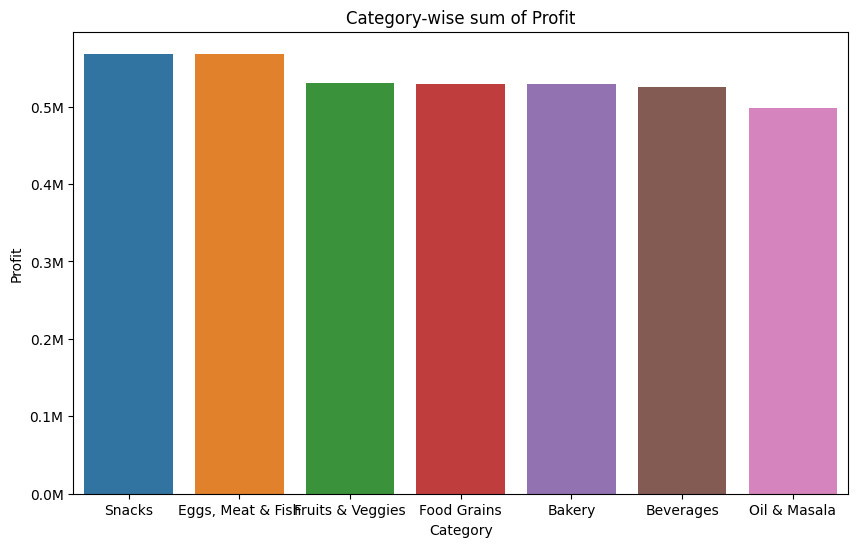

In [33]:
# Create the plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=category_s_p['Category'], y=category_s_p['Profit'])

# Set axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Category-wise sum of Profit')
plt.show()

To analyze sales and profit by region. We calculate the total sales and profit for each region. Here's how we can do it in Python:

In [34]:
# sales and profit by category
region_s_p=df.groupby('Region')[['Sales','Profit']].sum().reset_index().sort_values(by='Profit',ascending=False)
region_s_p

,Region,Sales,Profit
3,West,4798743,1192004.61
1,East,4248368,1074345.58
0,Central,3468156,856806.84
2,South,2440461,623562.89


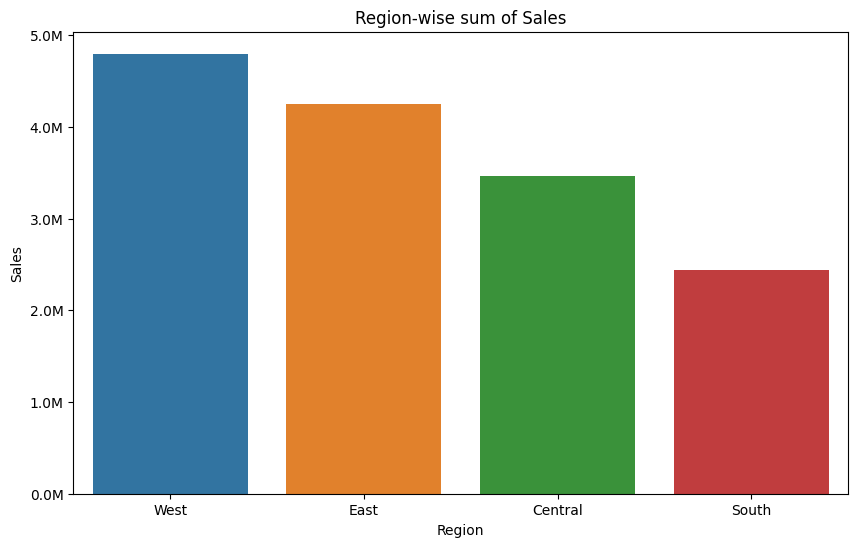

In [35]:
# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x*1e-6:.1f}M'

# Create the plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=region_s_p['Region'], y=region_s_p['Sales'])

# Set axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Region-wise sum of Sales')
plt.show()

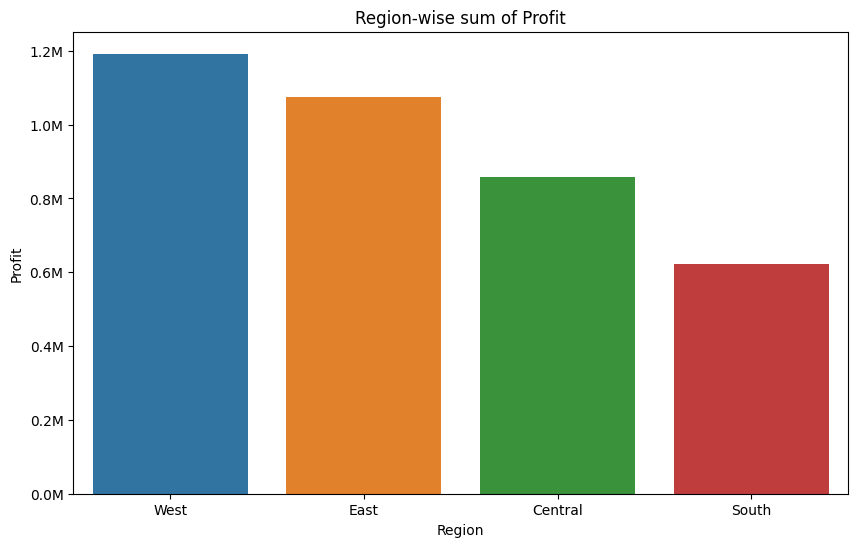

In [36]:
# Create the plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=region_s_p['Region'], y=region_s_p['Profit'])

# Set axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Region-wise sum of Profit')
plt.show()

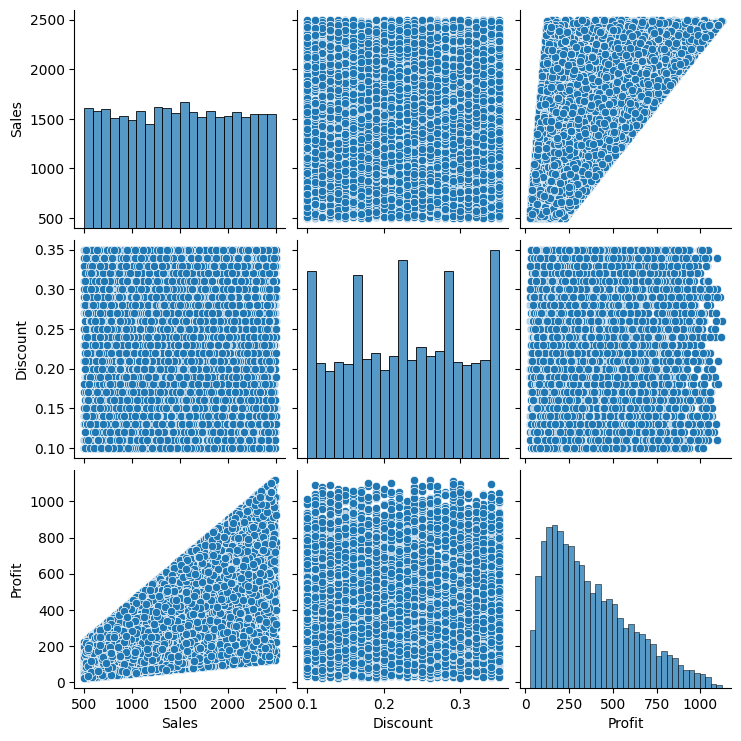

In [37]:
# Correlation between dependent and independent variables
sns.pairplot(df)
plt.show()

In [38]:
# cheking the linearity of numerical features
X=df[['Sales','Discount']]
Y=df['Profit']

In [39]:
model = sm.OLS(Y, X).fit()
Y_pred = model.predict(X)

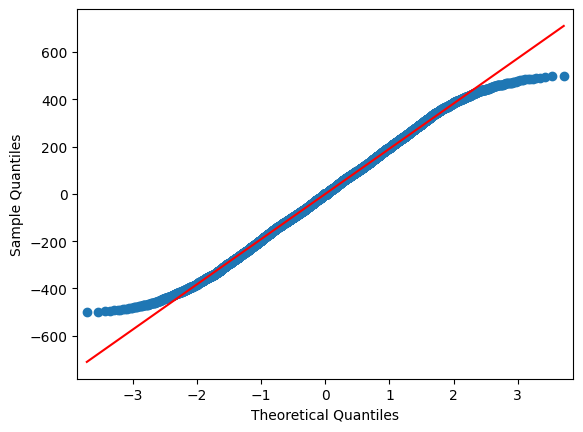

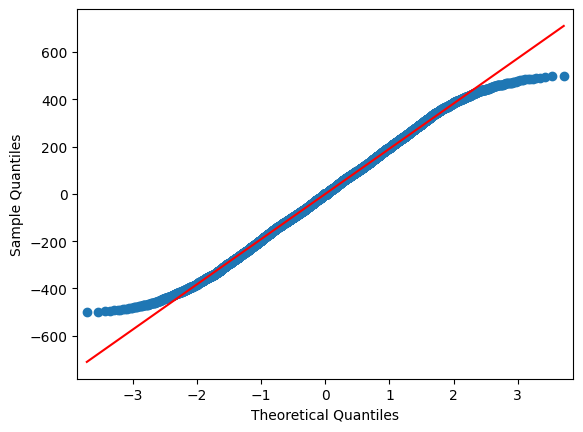

In [40]:
residuals = Y - Y_pred
sm.qqplot(residuals, line='s')

 The QQ plot shows that the residuals are roughly normally distributed, with some slight deviations in the tails.

In [41]:
# drop the un-important variables
df.drop(columns=['Customer_Name','Order_Date'],inplace=True)

In [42]:
df

,Category,Sub_Category,City,Region,Sales,Discount,Profit
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45
5,Food Grains,Organic Staples,Dharmapuri,West,2305,0.26,322.70
...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10
9990,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70
9991,Food Grains,Rice,Bodi,West,1567,0.16,501.44
9992,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24


In [43]:
# label encoder for categorical features
le=LabelEncoder()
for label in df.columns:
    if df[label].dtypes=='object':
        df[label]=le.fit_transform(df[label])

In [44]:
df

,Category,Sub_Category,City,Region,Sales,Discount,Profit
1,1,13,8,2,749,0.18,149.80
2,3,0,13,3,2360,0.21,165.20
3,4,12,4,2,896,0.25,89.60
4,3,18,12,2,2355,0.26,918.45
5,3,18,4,3,2305,0.26,322.70
...,...,...,...,...,...,...,...
9989,2,9,9,3,945,0.16,359.10
9990,0,1,6,3,1195,0.26,71.70
9991,3,20,0,3,1567,0.16,501.44
9992,5,22,14,3,1659,0.15,597.24


<Figure size 640x480 with 0 Axes>

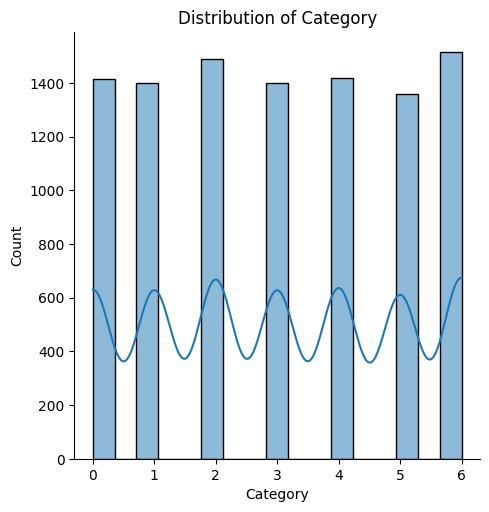

<Figure size 640x480 with 0 Axes>

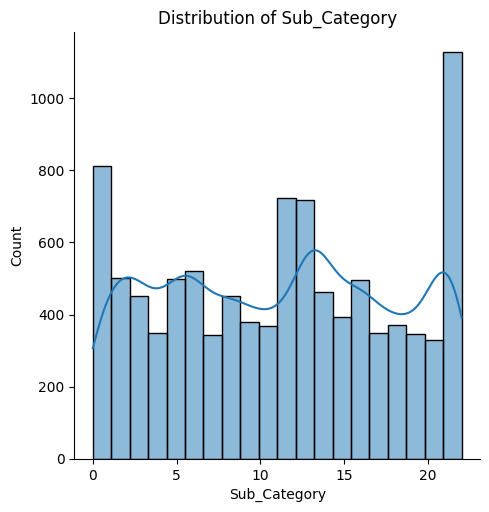

<Figure size 640x480 with 0 Axes>

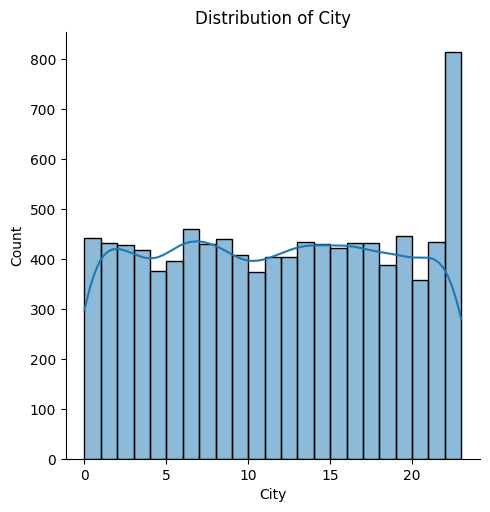

<Figure size 640x480 with 0 Axes>

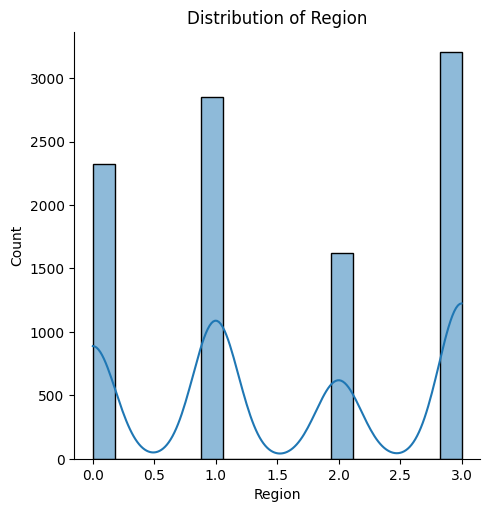

<Figure size 640x480 with 0 Axes>

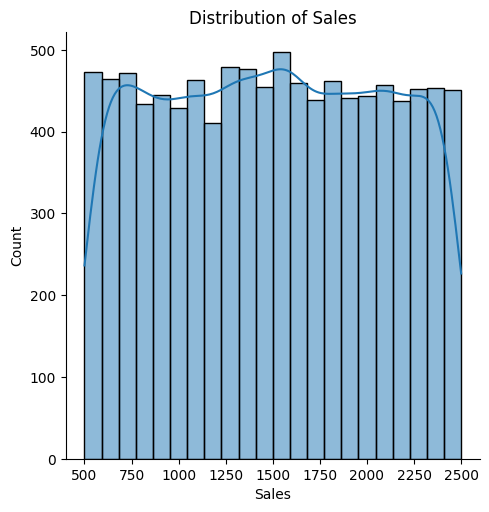

<Figure size 640x480 with 0 Axes>

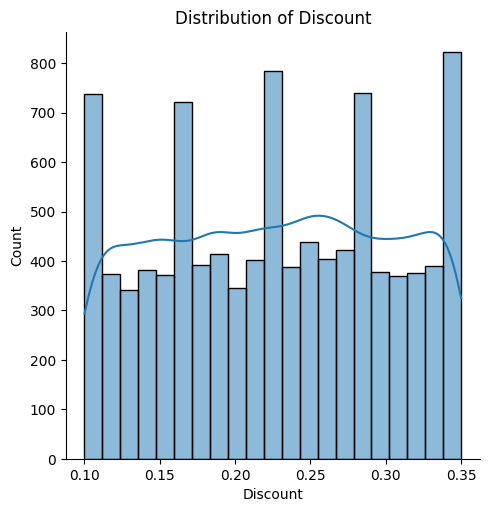

<Figure size 640x480 with 0 Axes>

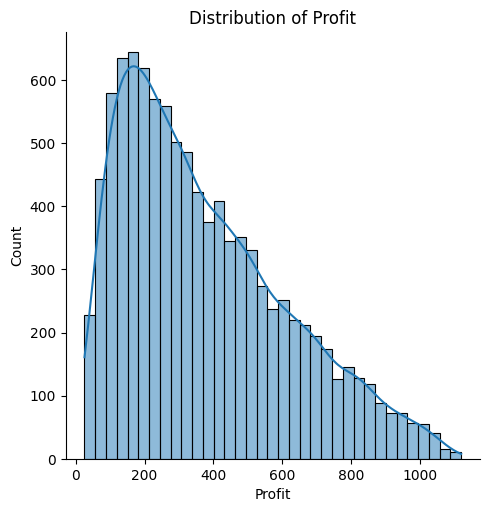

In [48]:
for column in df.columns:
    plt.figure()
    sns.displot(x=df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [49]:
for column in df.columns:
    print(df[column].skew())

0.0062881264200812465
0.008631629599937988
0.004175991377429898
-0.002964502844946433
0.0008078145083692308
-0.026629900249814615
0.7673927652337205


In [ ]:
sns.displot(xdf['Category'],kde=True)
plt.show()

In [ ]:
# splitting the data for dependent and independent features
x=df.drop('Profit',axis=1)
y=df['Profit']

## Linear (Multinomial) Regression

<b>Linear regression</b> is a statistical method for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

Linear regression: Y = b0 + b1X1 + b2X2 + ... + bn*Xn, where b0 is the intercept and b1 to bn are the coefficients of the predictor variables.

In [ ]:
# train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# standard scaling for numerical features
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# linear regression model
l_model=LinearRegression()
l_model.fit(x_train,y_train)

In [ ]:
# intercept values
l_model.intercept_

In [ ]:
# coefficient values
l_model.coef_

In [ ]:
# train and test predictions
train_pred=l_model.predict(x_train)
test_pred=l_model.predict(x_test)

In [ ]:
# rmse values for train and test
print('train RMSE: ',np.sqrt(mean_squared_error(y_train,train_pred)))
print('test RMSE: ',np.sqrt(mean_squared_error(y_test,test_pred)))

In [ ]:
# train and test r2 values
print('train r2-score: ',l_model.score(x_train,y_train))
print('test r2-score: ',l_model.score(x_test,y_test))

In [ ]:
# hyperparametric test
print('cross val score: ',cross_val_score(l_model,x,y,cv=5).mean())

We are using the Sales and Discount columns as input features and the Profit column as the target variable. We create a Multinomial Regression object and then use the cross_val_score function to perform 5-fold cross-validation. Finally, we print the average R^2 score, which gives us an estimate of the model's performance.

### Linearity of Errors

In [ ]:
# check the assumptions
test_res=y_test - test_pred

In [ ]:
x=0.36408253181685146 - 0.36408253181685146
x

In [ ]:
accuracy=l_model.score(x_train,y_train) - l_model.score(x_test,y_test)
accuracy

In [ ]:
# linearity of errors
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.title('Linearity of error')
plt.show()

The observed values vs. fitted values shows some evidence of Linearity.

### Normality of Errors

In [ ]:
# Normality of errors
sns.displot(test_res,bins=10,kde=True)
plt.title('Normality of Errors')
plt.show()

Distribution of profit seems to be data is distributed normally it is a normal distribution

### Equal Variances of Errors (Homoscadesicity)

In [ ]:
# Equal Variances of Errors (Homoscadesicity)
plt.scatter(test_pred,test_res)
plt.axhline(y=0,c='r')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.title('Equal Variances of Errors (Homoscadesicity)')
plt.show()

The residuals vs. fitted values shows some evidence of homoscedasticity, as the spread of the residuals seems to increase with larger predicted values.

### Variable Significance

#### Hypothesis testing
* <b>null hypothesis:</b> There is no relationship between input variable and output variable (and thus B1 equals zero)
* <b>alternative hypothesis:</b> There is a relationship between input variable and output variable (and thus B1 not equals zero)

In [ ]:
# Variables significance hypothesis testing for variables
model=smf.ols("y~x",data=df).fit()
model.summary()

#### Influence index plot

In [ ]:
# check the influence values
sm.graphics.influence_plot(model)

By using this influence index plot we can't identified the influenced values

#### Variance Inflation Factor (VIF):

* VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variables in the model.

In [ ]:
# calculating the VIF's values of independent variables
rsq_category=smf.ols('Category~Sub_Category+City+Region+Sales+Discount',data=x).fit().rsquared
vif_category=1/(1-rsq_category)
rsq_sub_category=smf.ols('Sub_Category~Category+City+Region+Sales+Discount',data=x).fit().rsquared
vif_sub_category=1/(1-rsq_sub_category)
rsq_city=smf.ols('City~Category+Sub_Category+Region+Sales+Discount',data=x).fit().rsquared
vif_city=1/(1-rsq_city)
rsq_region=smf.ols('Region~Category+Sub_Category+City+Sales+Discount',data=x).fit().rsquared
vif_region=1/(1-rsq_region)
rsq_sales=smf.ols('Sales~Category+Sub_Category+City+Region+Discount',data=x).fit().rsquared
vif_sales=1/(1-rsq_sales)
rsq_discount=smf.ols('Discount~Category+Sub_Category+City+Region+Sales',data=x).fit().rsquared
vif_discount=1/(1-rsq_discount)

In [ ]:
# storing VIF's values in a data frame
d1={'variables':['Category','Sub_Category','City','Region','Sales','Discount'],'vif_values':[vif_category,vif_sub_category,vif_city,vif_region,vif_sales,vif_discount]}
vif_frame=pd.DataFrame(d1)
vif_frame

These are the VIF values for the related variables

### Added Variable Plot (AV plot)

In [ ]:
# check the added variable plot (AV plot)
sm.graphics.plot_partregress_grid(model)

In [ ]:
# ploting the relation between actual and predicted values
fig_poly = go.Figure()
fig_poly.add_trace(go.Scatter(x=y_test, y=test_pred, mode='markers', name='Predictions'))
fig_poly.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Actual'))
fig_poly.update_layout(title='Multinomial Regression', xaxis_title='Actual', yaxis_title='Predictions')
fig_poly.show()

## Polynomial Regression:

<b>Polynomial regression</b> is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. This is useful when the relationship between x and y is not linear, but can be better approximated by a curve.

Polynomial regression: Y = b0 + b1X1 + b2X2 + ... + bnXn + b12X1^2 + b22X2^2 + ... + bnnXn^2, where the predictor variables are raised to different powers to capture nonlinear relationships.

In [ ]:
# Polynomial regression
poly_converter=PolynomialFeatures(degree=2,include_bias=False)
x_poly=pd.DataFrame(poly_converter.fit_transform(x))

In [ ]:
# train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

In [ ]:
# feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Polinomial regression
p_model=LinearRegression()
p_model.fit(x_train,y_train)

# predictions
train_pred=p_model.predict(x_train)
test_pred=p_model.predict(x_test)

# r2_values
print('train r2:',p_model.score(x_train,y_train))
print('test r2:',p_model.score(x_test,y_test))

# intercept & coefficient values
print('Intercept value: ',p_model.intercept_)
print('Coeficient values: ',p_model.coef_)

In [ ]:
# cross val score
print('cross val score:',cross_val_score(p_model,x_poly,y,cv=5).mean())

In [ ]:
# finding the best degree of freedem value
train_r2=[]
test_r2=[]
for i in range(1,5):
    poly_converter=PolynomialFeatures(degree=i,include_bias=False)
    x_poly=pd.DataFrame(poly_converter.fit_transform(x))

    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

    poly_model=LinearRegression()
    poly_model.fit(x_train,y_train)

    train_pred=poly_model.predict(x_train)
    test_pred=poly_model.predict(x_test)

    train_r2.append(poly_model.score(x_train,y_train))
    test_r2.append(poly_model.score(x_test,y_test))

In [ ]:
train_r2

In [ ]:
test_r2

In [ ]:
# finding the best polynomial value from plot
plt.plot(range(1,4),train_r2[:3],label='train')
plt.plot(range(1,4),test_r2[:3],label='test')
plt.xlabel('polynomial complexity')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# after finding the best polynomial value substitute here
final_poly_converter=PolynomialFeatures(degree=2,include_bias=False)
x_poly=pd.DataFrame(final_poly_converter.fit_transform(x))

x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

final_model=LinearRegression()
final_model.fit(x_train,y_train)

train_pred=final_model.predict(x_train)
test_pred=final_model.predict(x_test)

# rmse values for train and test
print('train RMSE: ',np.sqrt(mean_squared_error(y_train,train_pred)))
print('test RMSE: ',np.sqrt(mean_squared_error(y_test,test_pred)))

print('train_r2:',final_model.score(x_train,y_train))
print('test_r2:',final_model.score(x_test,y_test))

print('cross val score:',cross_val_score(p_model,x_poly,y,cv=5).mean())

In [ ]:
fig_poly = go.Figure()
fig_poly.add_trace(go.Scatter(x=y_test, y=test_pred, mode='markers', name='Predictions'))
fig_poly.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Actual'))
fig_poly.update_layout(title='Polynomial Regression', xaxis_title='Actual', yaxis_title='Predictions')
fig_poly.show()

* Polynomial regression is a regression task, and it is not appropriate to use classification metrics such as accuracy_score, precision_score, recall_score, and f1_score for evaluating the performance of a regression model. These metrics are designed to evaluate classification models that predict categorical labels, not regression models that predict continuous values.

* Instead, for evaluating the performance of a polynomial regression model, we can use regression evaluation metrics such as mean squared error (MSE), R-squared, and root mean squared error (RMSE). These metrics can provide insights into how well the model is fitting the data and how well it is generalizing to new data.

## Lasso Regression:

<b>LASSO (Least Absolute Shrinkage and Selection Operator)</b> is another regularization technique that adds a penalty term to the loss function of linear regression. However, unlike Ridge regression, LASSO uses the sum of the absolute values of the regression coefficients as the penalty term, which can result in some coefficients being exactly zero and thus performing feature selection.

LASSO regression: Y = b0 + b1X1 + b2X2 + ... + bnXn + λ|b1| + λ|b2| + ... + λ|bn|, where the absolute values of the coefficients are added to the cost function with a tuning parameter λ to induce sparsity.

In [ ]:
# lasso regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

lasso_model=Lasso()
lasso_model.fit(x_train,y_train)

train_pred=lasso_model.predict(x_train)
test_pred=lasso_model.predict(x_test)

print('train r2:',lasso_model.score(x_train,y_train))
print('test r2:',lasso_model.score(x_test,y_test))

In [ ]:
# cross val score
print('cross val score: ',cross_val_score(lasso_model,x,y,cv=5).mean())

In [ ]:
#hyperparameter tuning
estimator=Lasso()
param_grid={'alpha':[0.1,0.2,0.5,0.8,1,1.4,1.7,2,10,30,50,100]}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

In [ ]:
#substituting the hyperparameters
lasso_best=Lasso(alpha=2)
lasso_best.fit(x_train,y_train)

train_pred=lasso_best.predict(x_train)
test_pred=lasso_best.predict(x_test)

print('train accuracy:',lasso_best.score(x_train,y_train))
print('test accuracy:',lasso_best.score(x_test,y_test))

print('intercept:',lasso_best.intercept_)
print('coefficiant:',lasso_best.coef_)

print('cross val score: ',cross_val_score(lasso_best,x,y,cv=5).mean())

In [ ]:
# remove and once again applying the model
x_lasso=x.drop(x.columns[[1,3,5]],axis=1)
y_lasso=df['Profit']

x_train,x_test,y_train,y_test=train_test_split(x_lasso,y_lasso,test_size=0.3,random_state=9)

lasso_best=Lasso(alpha=2)
lasso_best.fit(x_train,y_train)

train_pred=lasso_best.predict(x_train)
test_pred=lasso_best.predict(x_test)

print('train r2:',lasso_best.score(x_train,y_train))
print('test r2:',lasso_best.score(x_test,y_test))

print('cross val score: ',cross_val_score(lasso_best,x,y,cv=5).mean())

We are using the Sales and Discount columns as input features and the Profit column as the target variable. We create a Lasso Regression object and then use the cross_val_score function to perform 5-fold cross-validation. Finally, we print the average R^2 score, which gives us an estimate of the model's performance.

In [ ]:
import plotly.graph_objects as go
fig_poly = go.Figure()
fig_poly.add_trace(go.Scatter(x=y_test, y=test_pred, mode='markers', name='Predictions'))
fig_poly.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Actual'))
fig_poly.update_layout(title='Lasso Regression', xaxis_title='Actual', yaxis_title='Predictions')
fig_poly.show()

## Ridge Regression:

<b>Ridge regression</b> is a regularization technique that adds a penalty term to the loss function of linear regression to prevent overfitting. The penalty term is proportional to the sum of the squared values of the regression coefficients, which forces them to be small and thus less likely to amplify noise in the data.

Ridge regression: Y = b0 + b1X1 + b2X2 + ... + bnXn + λ(b1^2 + b2^2 + ... + bn^2), where the sum of the squared coefficients is added to the cost function with a tuning parameter λ to prevent overfitting.

In [ ]:
# Ridge regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

ridge_model=Ridge()
ridge_model.fit(x_train,y_train)

train_pred=ridge_model.predict(x_train)
test_pred=ridge_model.predict(x_test)

print('train r2:',ridge_model.score(x_train,y_train))
print('test r2:',ridge_model.score(x_test,y_test))

print('cross val score: ',cross_val_score(lasso_model,x,y,cv=5).mean())

In [ ]:
#hyperparameter tuning
estimator=Ridge()
param_grid={'alpha':[0.1,0.2,0.5,0.8,1,1.4,1.7,2,10,30,50,100]}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

Define the features and target variable. We then instantiate a Ridge model with an alpha value of 10, and use the cross_val_score function from sklearn.model_selection to perform 5-fold cross-validation. You can adjust the alpha value and the number of folds in the cross-validation by changing the arguments passed to Ridge and cross_val_score, respectively.

In [ ]:
#substituting the hyperparameters
ridge_best=Ridge(alpha=10)
ridge_best.fit(x_train,y_train)

train_pred=ridge_best.predict(x_train)
test_pred=ridge_best.predict(x_test)

print('train accuracy:',ridge_best.score(x_train,y_train))
print('test accuracy:',ridge_best.score(x_test,y_test))

print('intercept:',ridge_best.intercept_)
print('coefficiant:',ridge_best.coef_)

print('cross val score: ',cross_val_score(ridge_best,x,y,cv=5).mean())

In [ ]:
import plotly.graph_objects as go
fig_poly = go.Figure()
fig_poly.add_trace(go.Scatter(x=y_test, y=test_pred, mode='markers', name='Predictions'))
fig_poly.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Actual'))
fig_poly.update_layout(title='Ridge Regression', xaxis_title='Actual', yaxis_title='Predictions')
fig_poly.show()

## RandomForest Regressor:

In [ ]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

train_pred=rf_model.predict(x_train)
test_pred=rf_model.predict(x_test)

print('train r2:',rf_model.score(x_train,y_train))
print('test r2:',rf_model.score(x_test,y_test))

print('cross val score: ',cross_val_score(rf_model,x,y,cv=5).mean())

In [ ]:
rf_model.feature_importances_

In [ ]:
pd.DataFrame(index=x.columns,data=rf_model.feature_importances_,columns=['feture importance'])

In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=0)
param_grid={'n_estimators':list(range(1,10))}
grid=GridSearchCV(estimator,param_grid,scoring='neg_mean_squared_error',cv=5)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
#random forest with best param values
model=RandomForestRegressor(n_estimators=9,random_state=0)
model.fit(x_train,y_train)

train_ypred=model.predict(x_train)
test_ypred=model.predict(x_test)

print('train r2:',model.score(x_train,y_train))
print('test r2:',model.score(x_test,y_test))

print('cross val score: ',cross_val_score(rf_model,x,y,cv=5).mean())

#### Conclusions:

* Linear regression is a simple and effective model that can provide valuable insights into the relationship between the predictors and the response variable. It can be used to identify the most important factors that influence sales, such as customer demographics, product features, and marketing strategies. However, it assumes a linear relationship between the predictors and the response, which may not always hold in real-world scenarios.

* Polynomial regression is a more flexible model that can capture nonlinear relationships between the predictors and the response variable. By adding higher-order terms to the model, we can account for curvature and interactions between the predictors. However, it can also lead to overfitting and is more complex than linear regression.

* LASSO regression is another regularization technique that can induce sparsity in the model coefficients by adding the absolute values of the coefficients to the cost function. By setting the tuning parameter λ appropriately, we can shrink some of the coefficients to zero and select the most relevant predictors. It is useful when dealing with high-dimensional data or when we want to identify the most important predictors.

* Ridge regression is a regularization technique that can prevent overfitting by adding a penalty term to the cost function. By controlling the tuning parameter λ, we can balance the trade-off between bias and variance and improve the model's generalization performance. It is particularly useful when dealing with multicollinearity or a large number of predictors.